In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import sys
import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance
import numpy.random as npr
from tools_lnd import make_h_all, PC_axes, proximate_fp, calc_relevant_jacobian
from tools_lnd import make_dendro, gen_trials_from_model_dir, gen_X_from_model_dir, get_T_inds

In [3]:
# rule_trains = ['oneperiodgo',]# 
rule_trains = hp['rule_trains']
n_tasks = str(len(rule_trains)) #15
l2w = -5
l2h = -6
l1w = 0
l1h = 0
n_rnn = 256 
model_n = 0
activation = 'softplus'

s = '_'
rule_trains_str = 'l2w0001_'+s.join(rule_trains)
rule_trains_str = 'l2_w'+str(-l2w)+'_h'+str(-l2h)+'_'+s.join(rule_trains)
# rule_trains_str = 'no_training'
folder = str(model_n)

# filedir = os.path.join('data','rnn','multitask','stepnet','crystals','softplus',str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',
#                        'l2_w'+str(-l2w)+'_h'+str(-l2h)+rule_trains_str,folder)

# filedir = os.path.join('data','rnn','multitask','stepnet','crystals','softplus','l2w0001_'+rule_trains_str,folder)
filedir = os.path.join('data','rnn','multitask','stepnet','crystals',activation,str(n_tasks)+'_tasks',str(n_rnn)+'_n_rnn',rule_trains_str,folder)

m = os.path.join(p,filedir)

model = FixedPoint_Model(m)
with tf.Session() as sess:
    model.restore()
    hp = model.hp
task_list = hp['rule_trains']

NameError: name 'hp' is not defined

In [ ]:
from tools_lnd import name_best_ckpt
#These plots show some targets and outputs, again to show that the network looks sufficiently trained\n",
rule_trains = hp['rule_trains']
rule = rule_trains[10]
# ckpt_n = name_best_ckpt(m,rule)
# ckpt_n_dir = os.path.join(m,'ckpts/model.ckpt-' + str(int(ckpt_n)))
model = Model(m)
with tf.Session() as sess:
#     model.saver.restore(sess,ckpt_n_dir)
    model.restore()
    model._sigma=0
    var_list = model.var_list
    hp = model.hp
    trial = generate_trials(rule, hp, mode='random', noise_on=True, batch_size =100, delay_fac =1)
    feed_dict = tools.gen_feed_dict(model, trial, hp)
    h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict)

for y in range(4): # look at outputs compared to targets on 4 trials
    fig = plt.figure(figsize=(15, 5))
    for x in range(1,4): #three outputs
        ax = fig.add_subplot(1,3,x)
        plt.plot(trial.y[:,y,x-1],label = 'target')
        plt.plot(y_hat_tf[:,y,x-1],label = 'output')
        plt.ylim([-1.5,1.5])
        plt.legend()
    plt.show()

In [5]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/diag/15_tasks/256_n_rnn/l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0'
variance.compute_variance(m)

IndexError: list index out of range

In [ ]:
from tools_lnd import plot_training

In [30]:
model = FixedPoint_Model(m)
with tf.Session() as sess:
    model.restore()
    hp = model.hp

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt


In [31]:
hp

{u'activation': u'retanh',
 u'alpha': 0.2,
 u'batch_size_test': 8192,
 u'batch_size_train': 64,
 u'c_intsyn': 0,
 u'delay_fac': 1,
 u'dt': 20,
 u'in_type': u'normal',
 u'ksi_intsyn': 0,
 u'l1_h': -0.0,
 u'l1_weight': -0.0,
 u'l2_h': 1e-06,
 u'l2_weight': 1e-06,
 u'l2_weight_init': 0,
 u'learning_rate': 0.001,
 u'loss_type': u'lsq',
 u'n_eachring': 2,
 u'n_input': 25,
 u'n_output': 3,
 u'n_rep': 256,
 u'n_rnn': 256,
 u'n_rule': 20,
 u'num_ring': 2,
 u'optimizer': u'adam',
 u'p_weight_train': None,
 'rng': <mtrand.RandomState at 0x7fc94b68c870>,
 u'rnn_type': u'LeakyRNN',
 u'rule_probs': [0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667],
 u'rule_start': 5,
 u'rule_trains': [u'fdgo',
  u'reactgo',
  

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Choosing 2 clusters


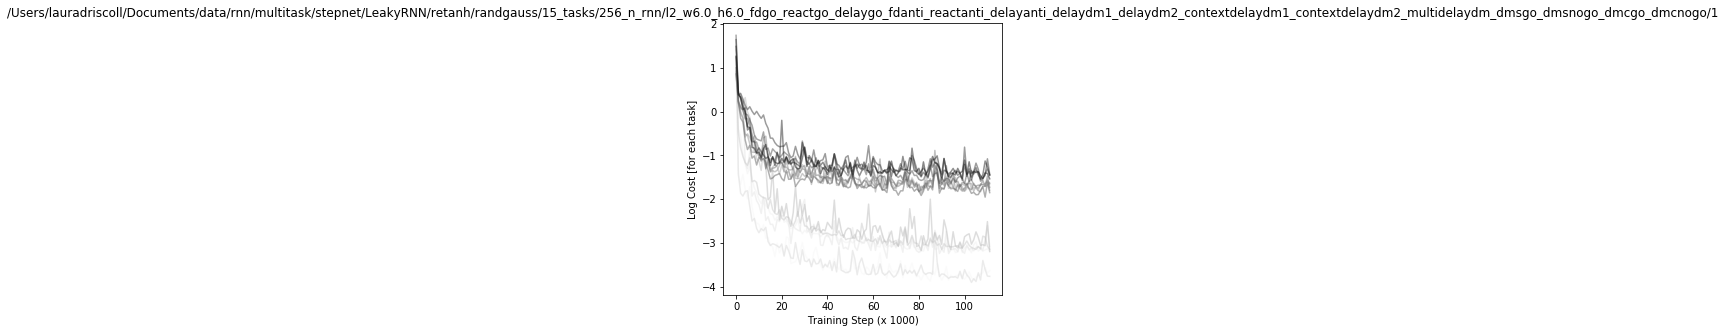

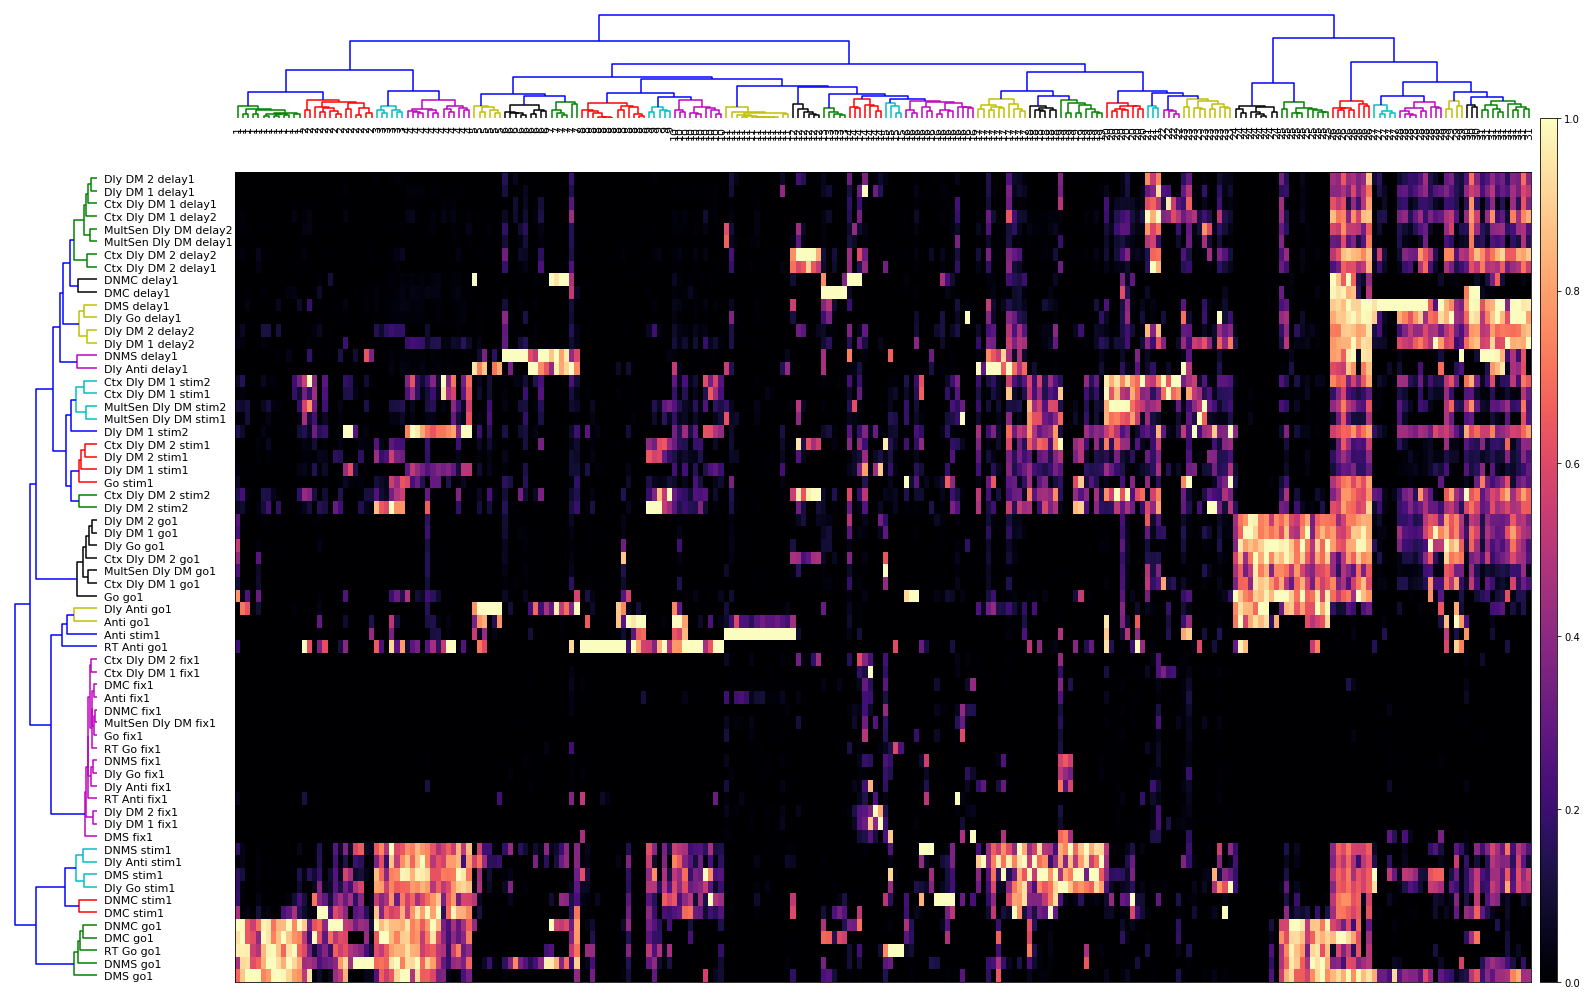

In [32]:
#NO TRAINING
# rule_trains = ['oneperiodgo',]
# num_tasks = str(len(rule_trains))
# l2w = -4
# l2h = 0
# l1w = 0
# l1h = 0
# n_rnn = 256 
# model_n = 1

# s = '_'
# rule_trains_str = s.join(rule_trains)
# folder = str(model_n)
# filedir = os.path.join(PATH_YANGNET,'data','crystals','softplus','1_tasks','l2w0001_'+rule_trains_str,folder)
# m = os.path.join(p,filedir)

plot_training(m)

make_dendro(m)

In [8]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/tanh/randgauss/15_tasks/256_n_rnn/l2_w6_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1'

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/tanh/randgauss/15_tasks/256_n_rnn/l2_w6_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/tanh/randgauss/15_tasks/256_n_rnn/l2_w6_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


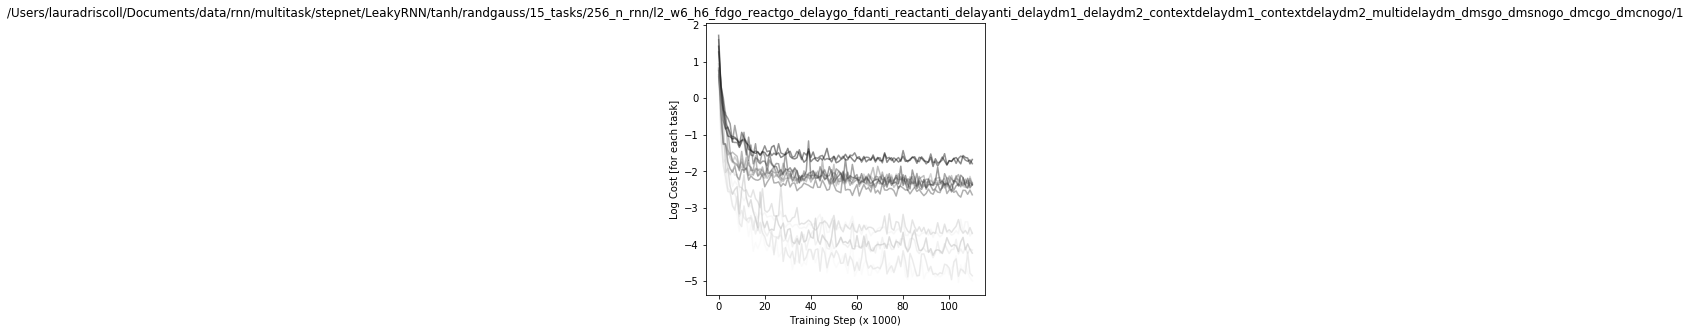

Choosing 2 clusters


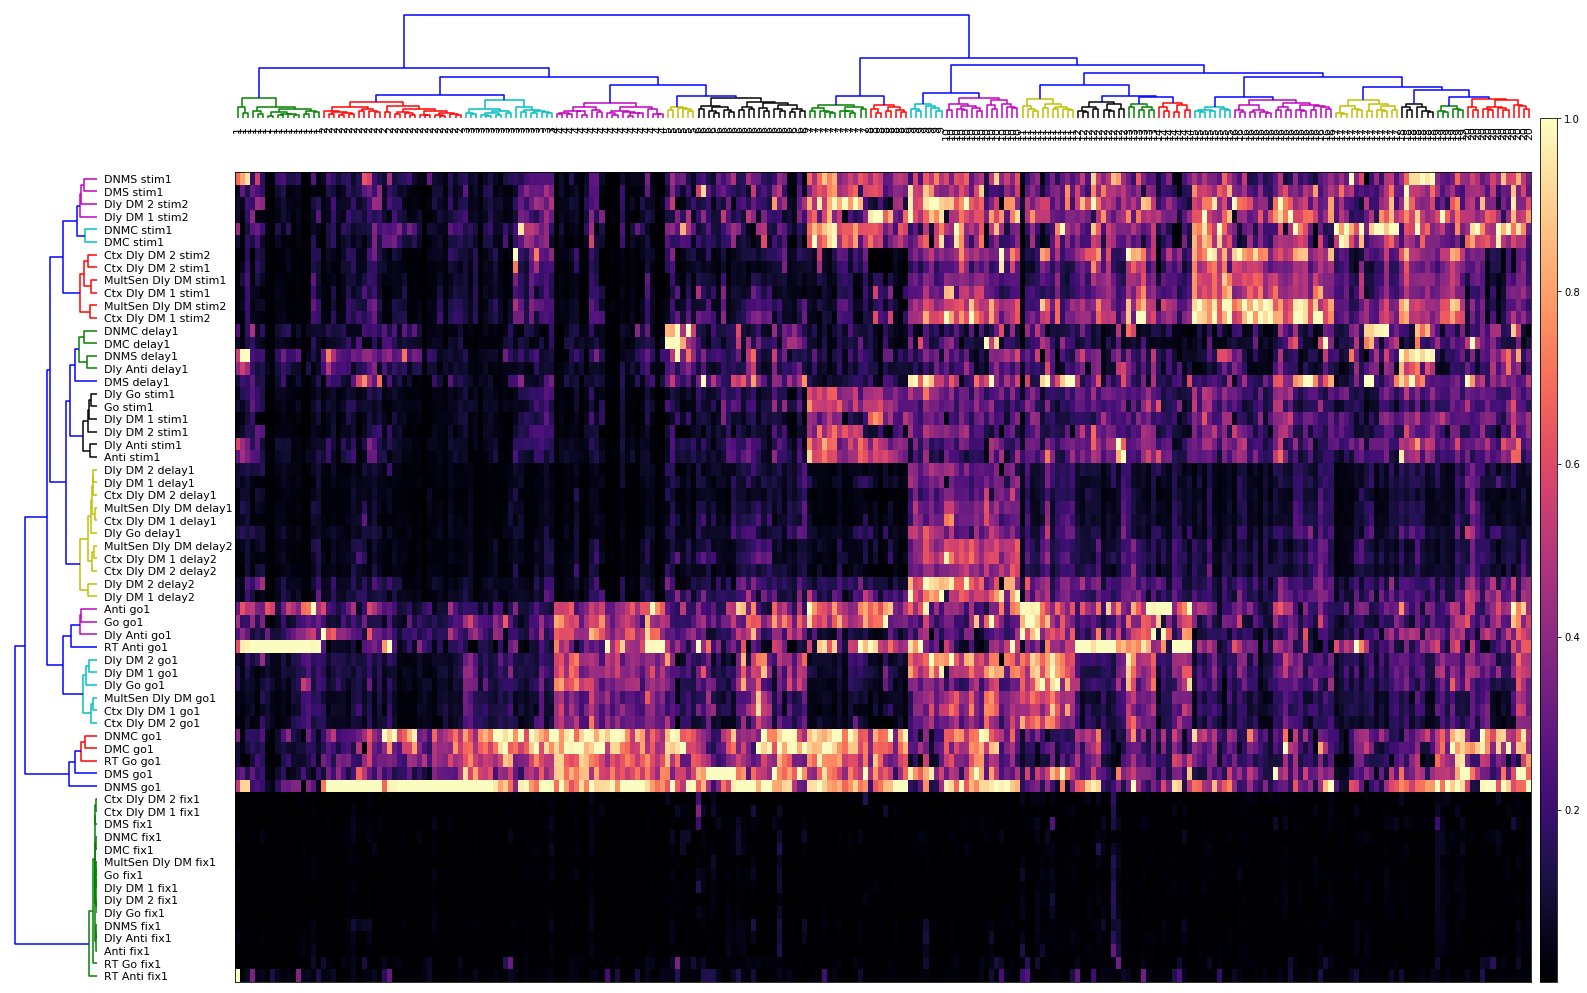

In [9]:
#NO TRAINING
# rule_trains = ['oneperiodgo',]
# num_tasks = str(len(rule_trains))
# l2w = -4
# l2h = 0
# l1w = 0
# l1h = 0
# n_rnn = 256 
# model_n = 1

# s = '_'
# rule_trains_str = s.join(rule_trains)
# folder = str(model_n)
# filedir = os.path.join(PATH_YANGNET,'data','crystals','softplus','1_tasks','l2w0001_'+rule_trains_str,folder)
# m = os.path.join(p,filedir)

plot_training(m)

make_dendro(m)

Variables being optimized:
<tf.Variable 'rnn/gru_cell/gates/kernel:0' shape=(281, 512) dtype=float32_ref>
<tf.Variable 'rnn/gru_cell/gates/bias:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'rnn/gru_cell/candidate/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/gru_cell/candidate/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/LeakyRNN/retanh/randgauss/15_tasks/256_n_rnn/l2_w6_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextd

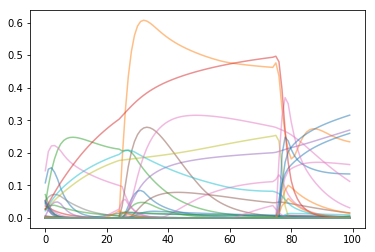

In [39]:
rule = 'fdgo'
model = Model(m)
with tf.Session() as sess:
#     model.saver.restore(sess,ckpt_n_dir)
    model.restore()
    model._sigma=0
    var_list = model.var_list
    hparams = model.hp
    trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size =100, delay_fac =1)
    feed_dict = tools.gen_feed_dict(model, trial, hparams)
    h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict)
    
plt.plot(h_tf[:,0,0:100],alpha = .5)
plt.show()

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


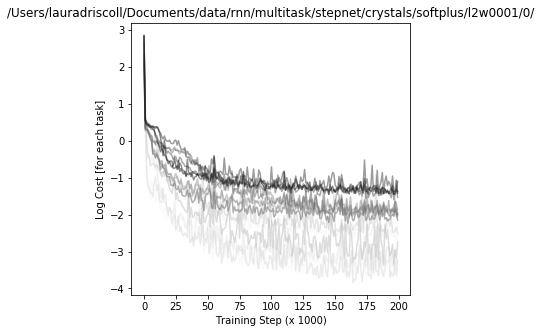

Choosing 18 clusters


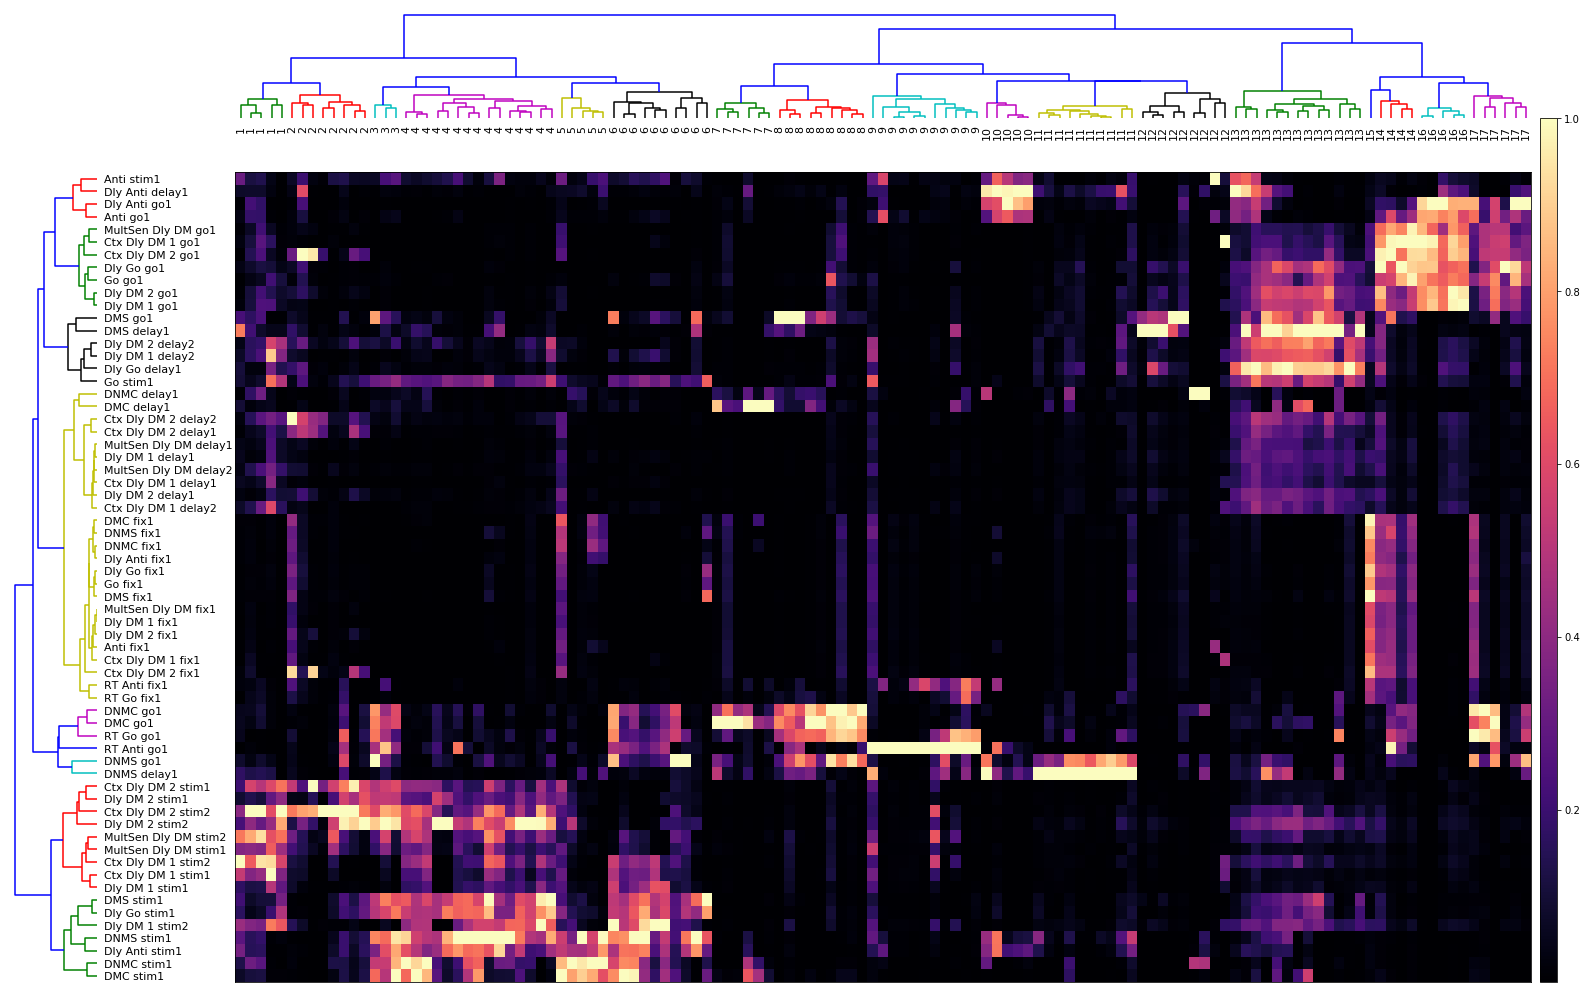

In [7]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'l2w0001/0/'
m = os.path.join(data_folder,file_spec)
# variance.compute_variance(m)

plot_training(m)

make_dendro(m)

In [8]:
m

'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/'

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


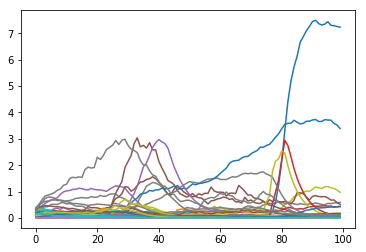

In [13]:
rule = 'fdgo'
model = Model(m)
# ckpt_n = name_best_ckpt(m,rule)
# ckpt_n_dir = os.path.join(m,'ckpts/model.ckpt-' + str(int(ckpt_n)))
with tf.Session() as sess:
#     model.saver.restore(sess,ckpt_n_dir)
    model.restore()
    model._sigma=0
    var_list = model.var_list
    hparams = model.hp
    trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size =100, delay_fac =1)
    feed_dict = tools.gen_feed_dict(model, trial, hparams)
    h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict)
    
plt.plot(h_tf[:,60,0:100])
plt.show()

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/256_n_rnn/l2_w5_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/256_n_rnn/l2_w5_h6_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


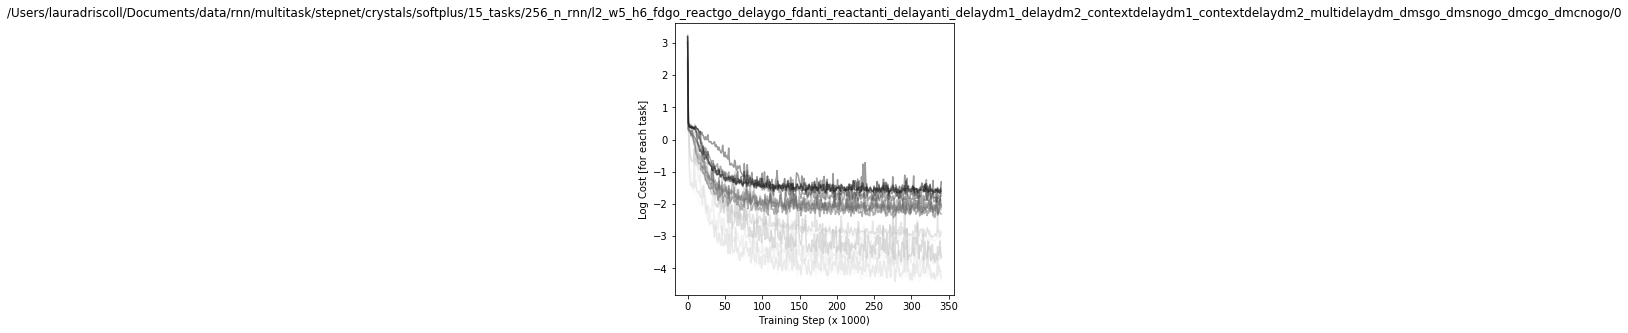

Choosing 33 clusters


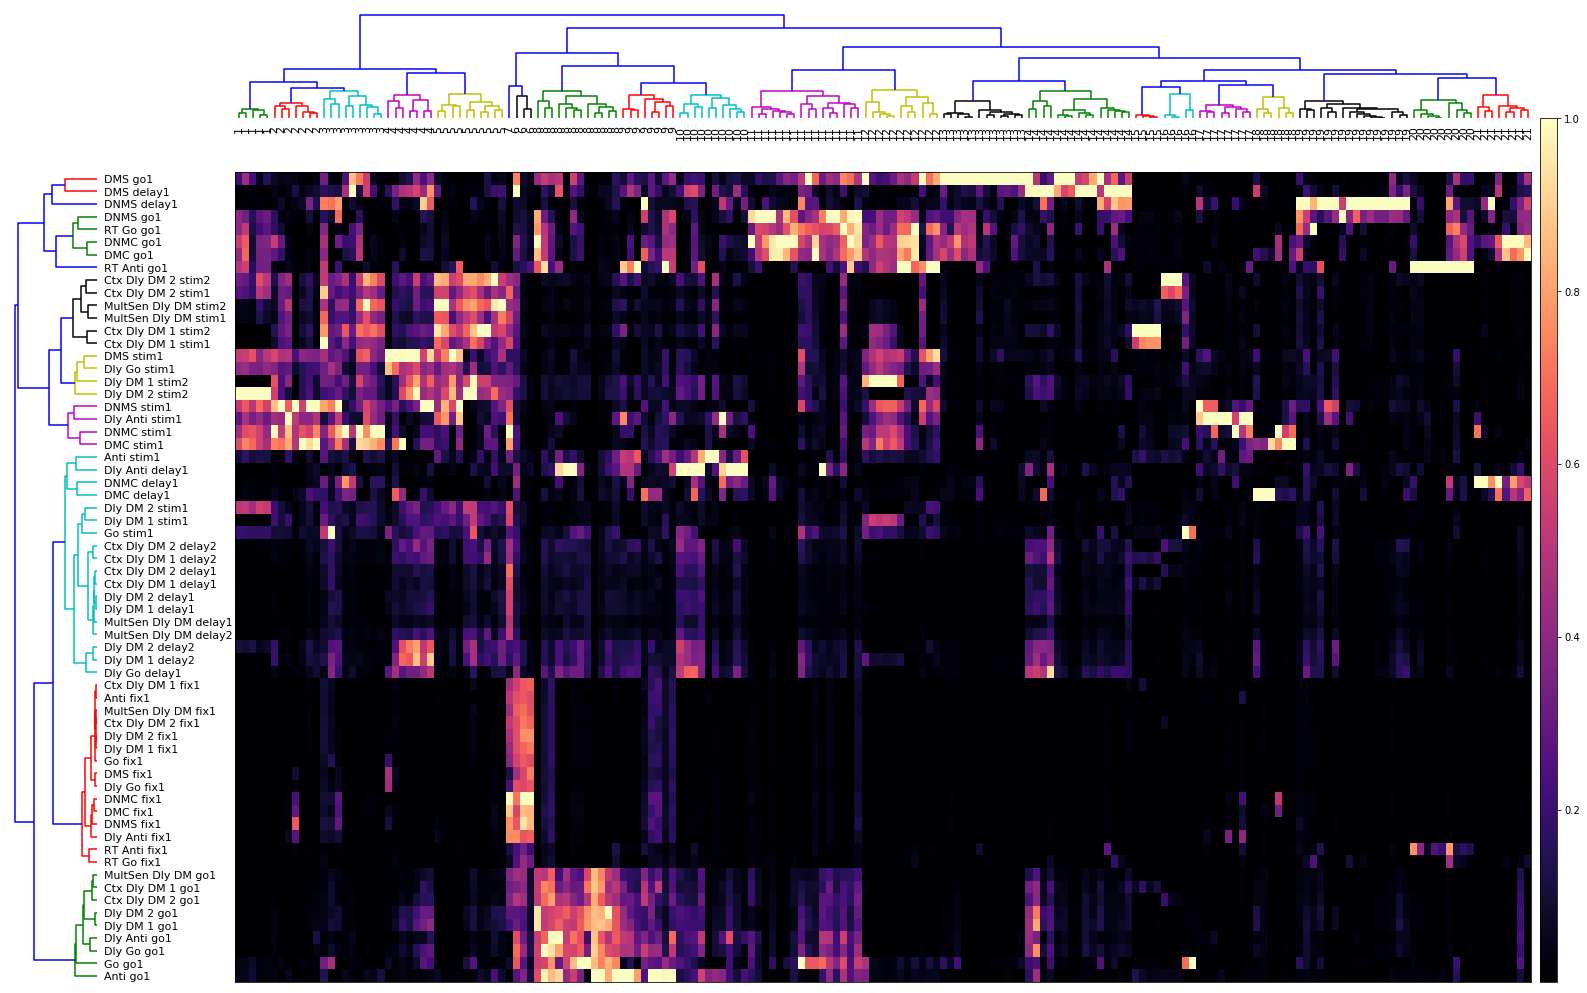

In [8]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'l2w0001/0/'
m = os.path.join(data_folder,file_spec)
# variance.compute_variance(m)

plot_training(m)

make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/model.ckpt
['fdgo', 'delaygo', 'fdanti', 'delayanti']
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/variance_rule.pkl
Variance saved at /Users/l

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


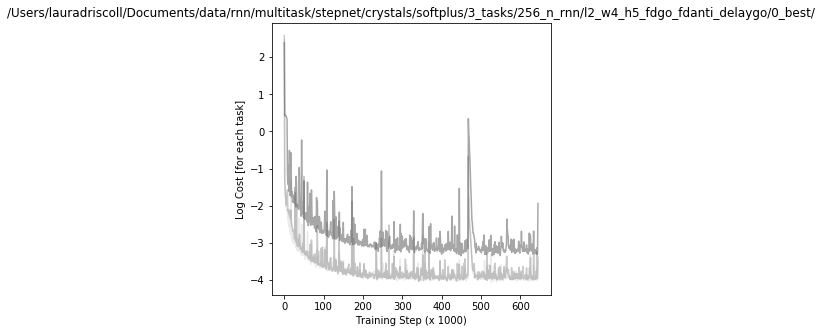

Choosing 7 clusters


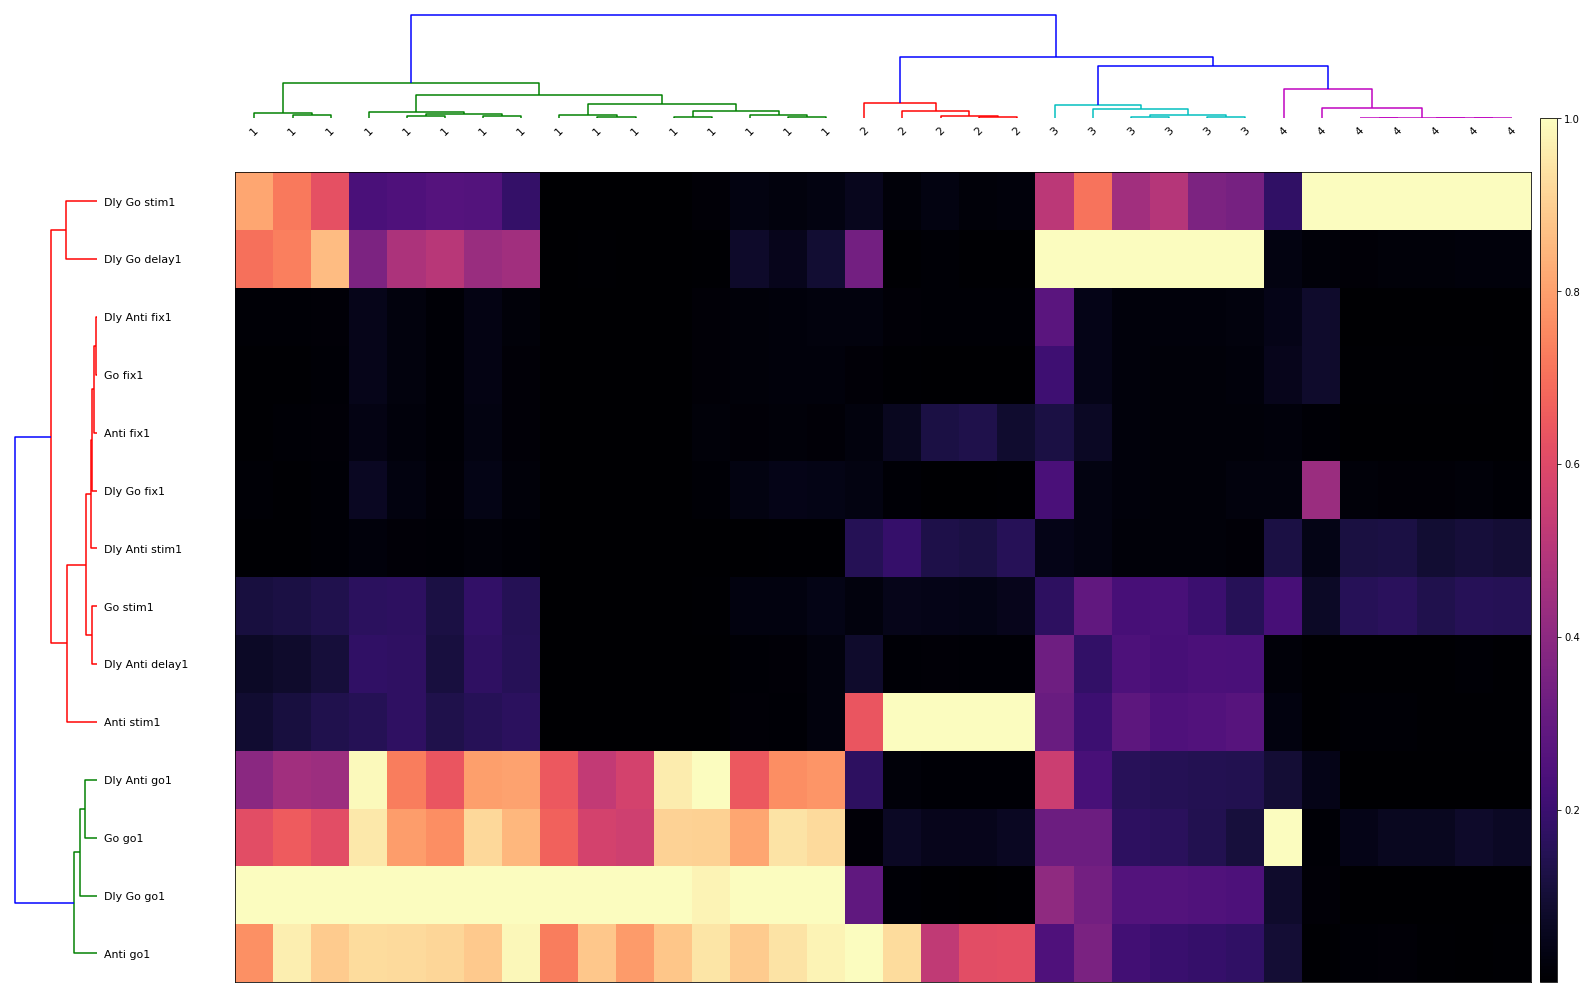

In [5]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/'
m = os.path.join(data_folder,file_spec)
variance.compute_variance(m,rules = ['fdgo','delaygo', 'fdanti', 'delayanti'])

plot_training(m)

make_dendro(m)

Choosing 5 clusters


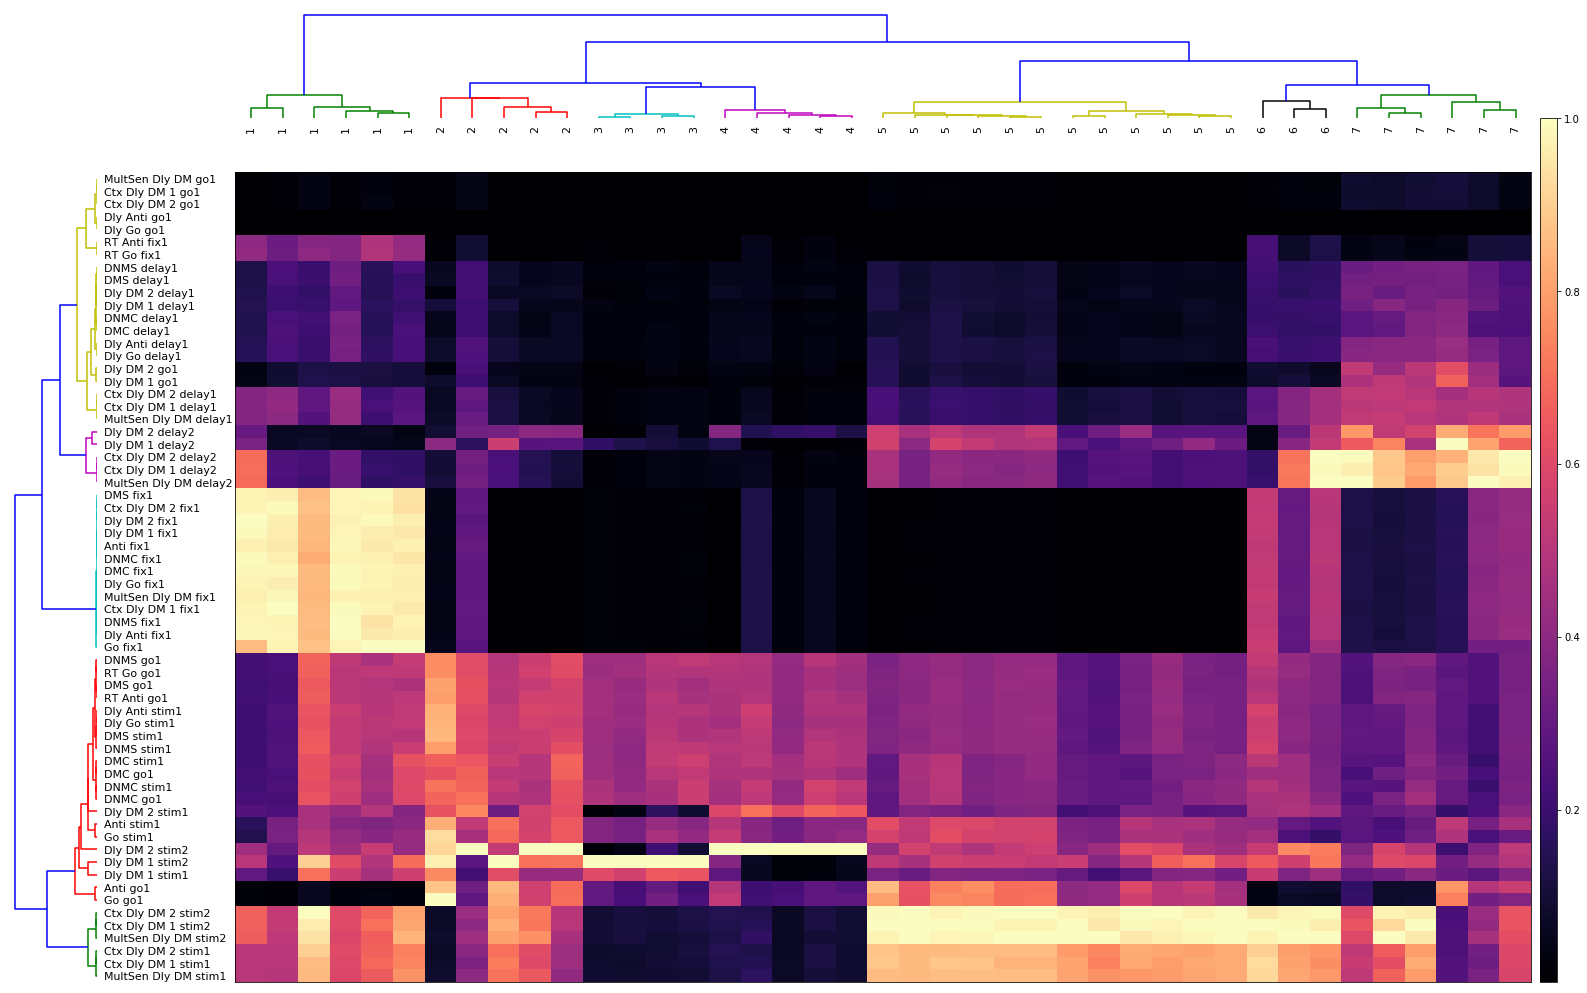

In [9]:
#SINGLE EPOCH TRAINING
rule_trains = ['oneperiodgo',]
num_tasks = str(len(rule_trains))
l2w = -4
l2h = 0
l1w = 0
l1h = 0
n_rnn = 256 
model_n = 0

s = '_'
rule_trains_str = s.join(rule_trains)
folder = str(model_n)
filedir = os.path.join(PATH_YANGNET,'data','crystals','softplus','1_tasks','l2w0001_'+rule_trains_str,folder)
m = os.path.join(p,filedir)

plot_training(m)

make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt


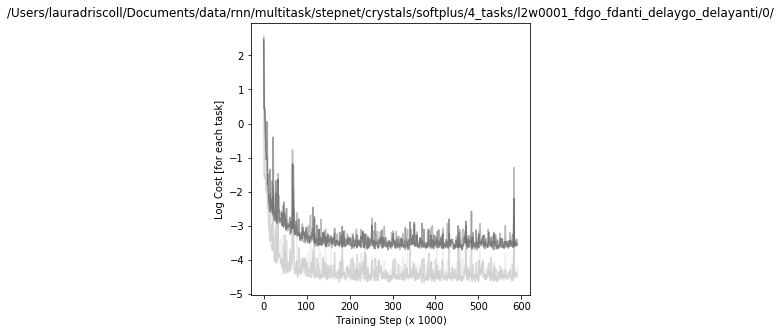

Choosing 12 clusters


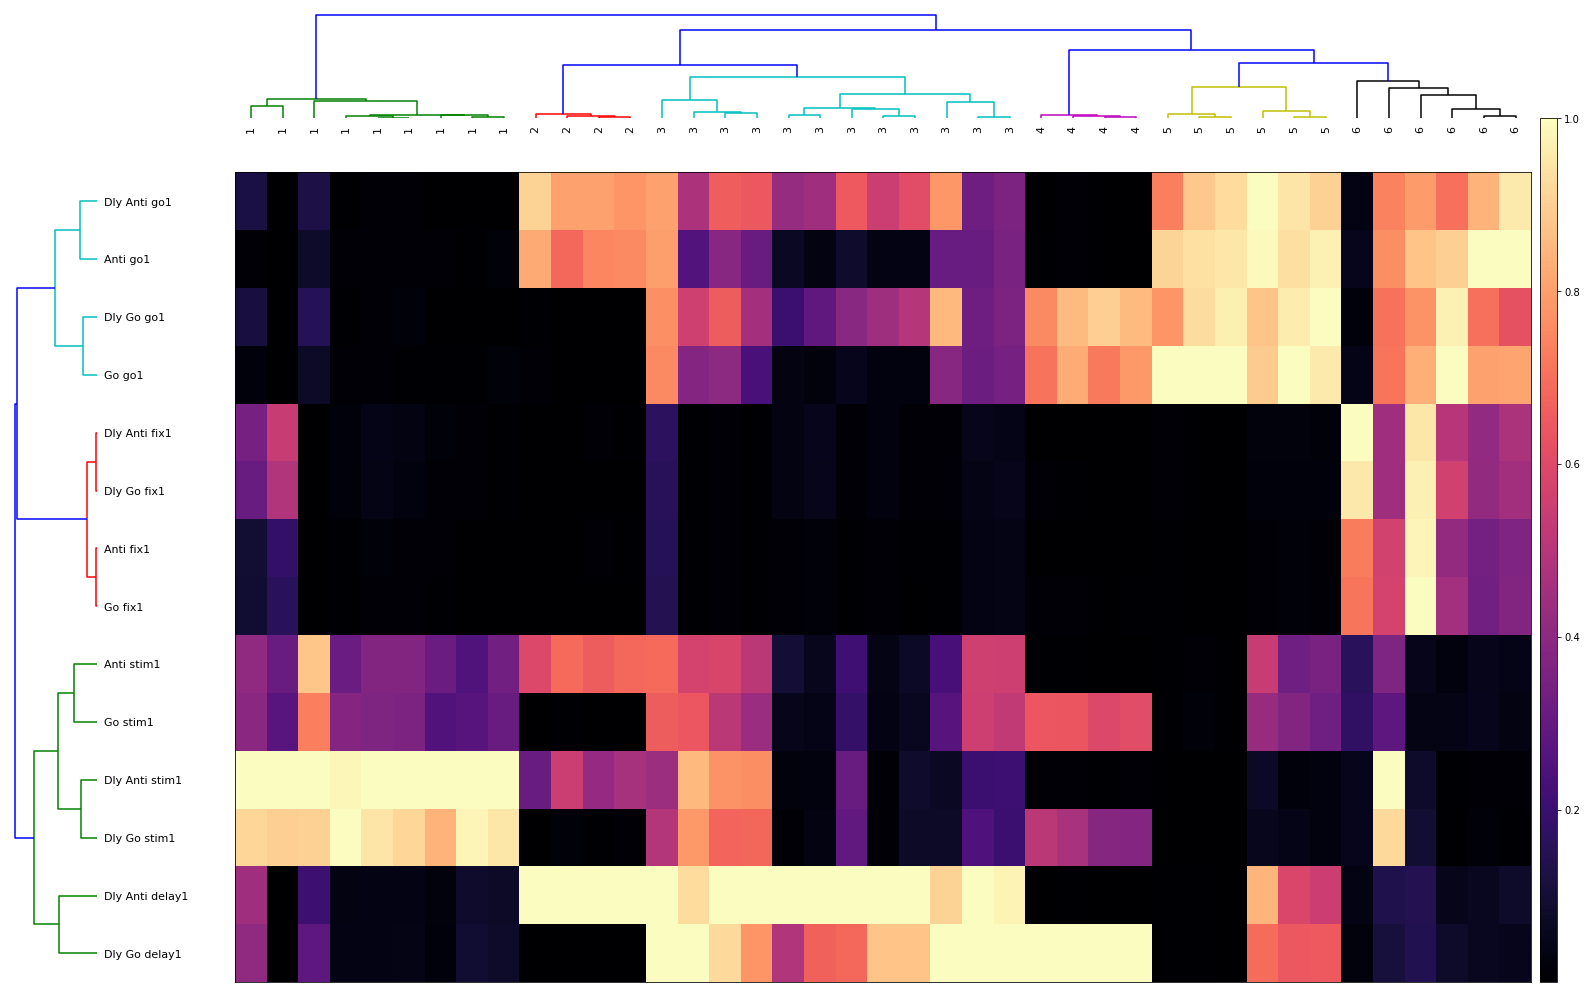

In [18]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2h00001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2h00001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt


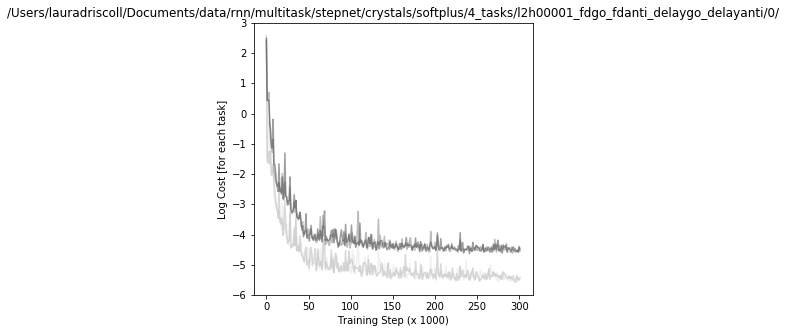

Choosing 5 clusters


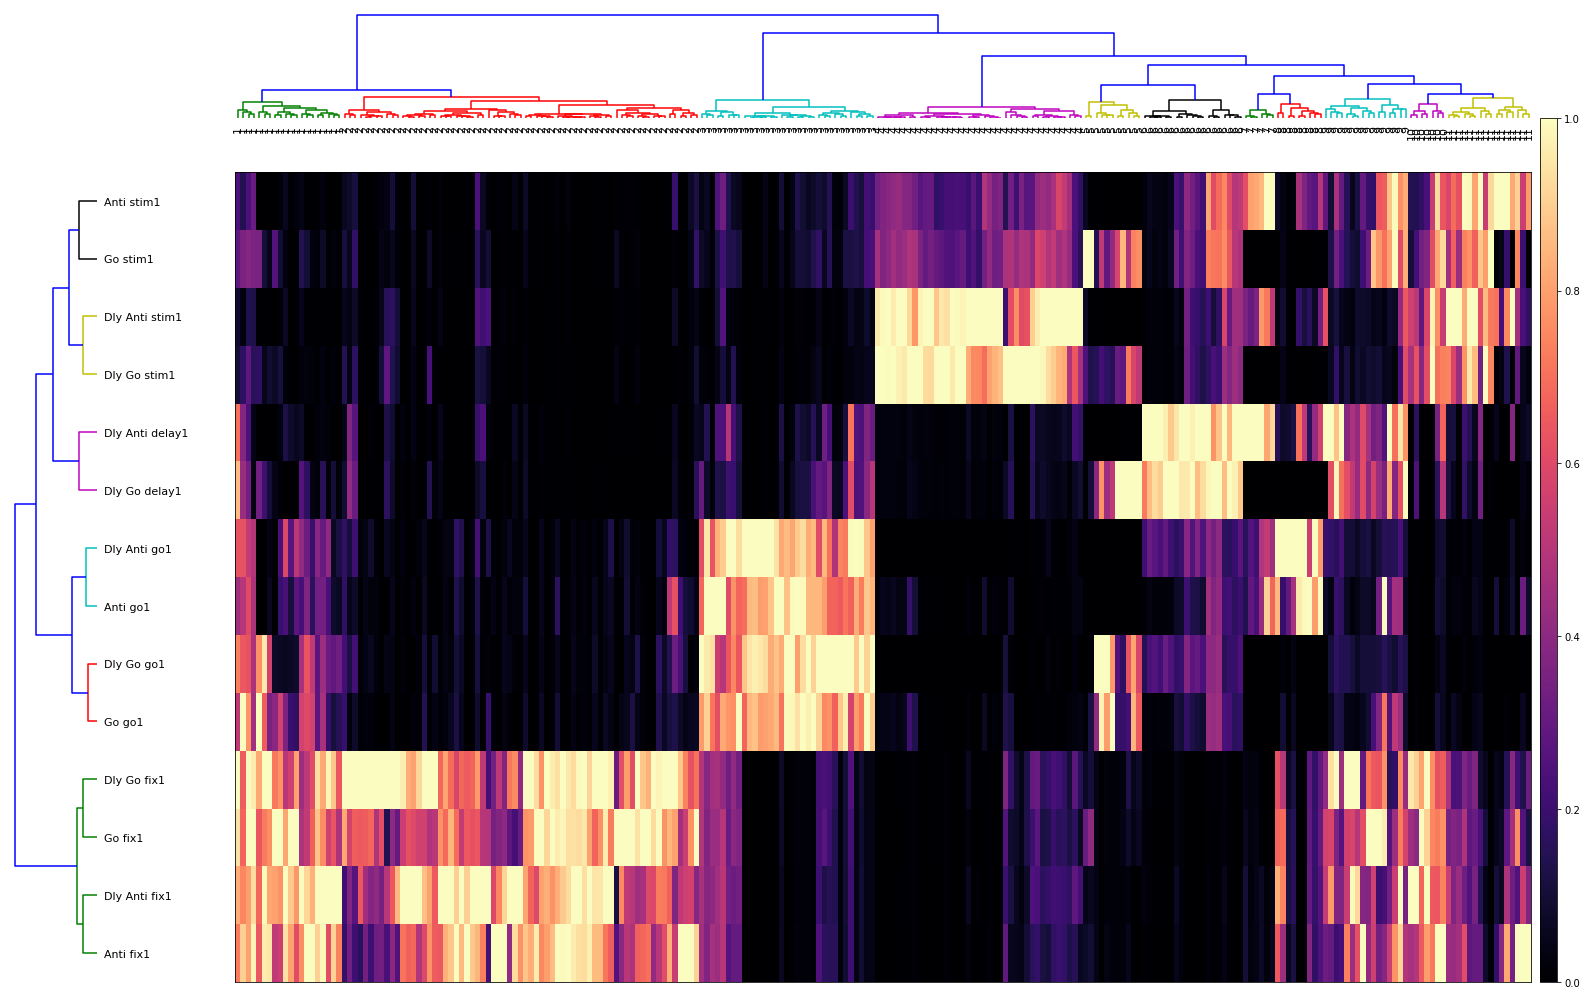

In [16]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/l2h00001_fdgo_fdanti_delaygo_delayanti/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2h000001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2h000001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt


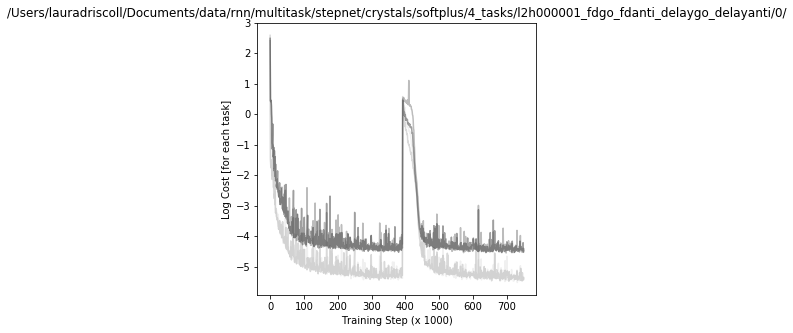

Choosing 3 clusters


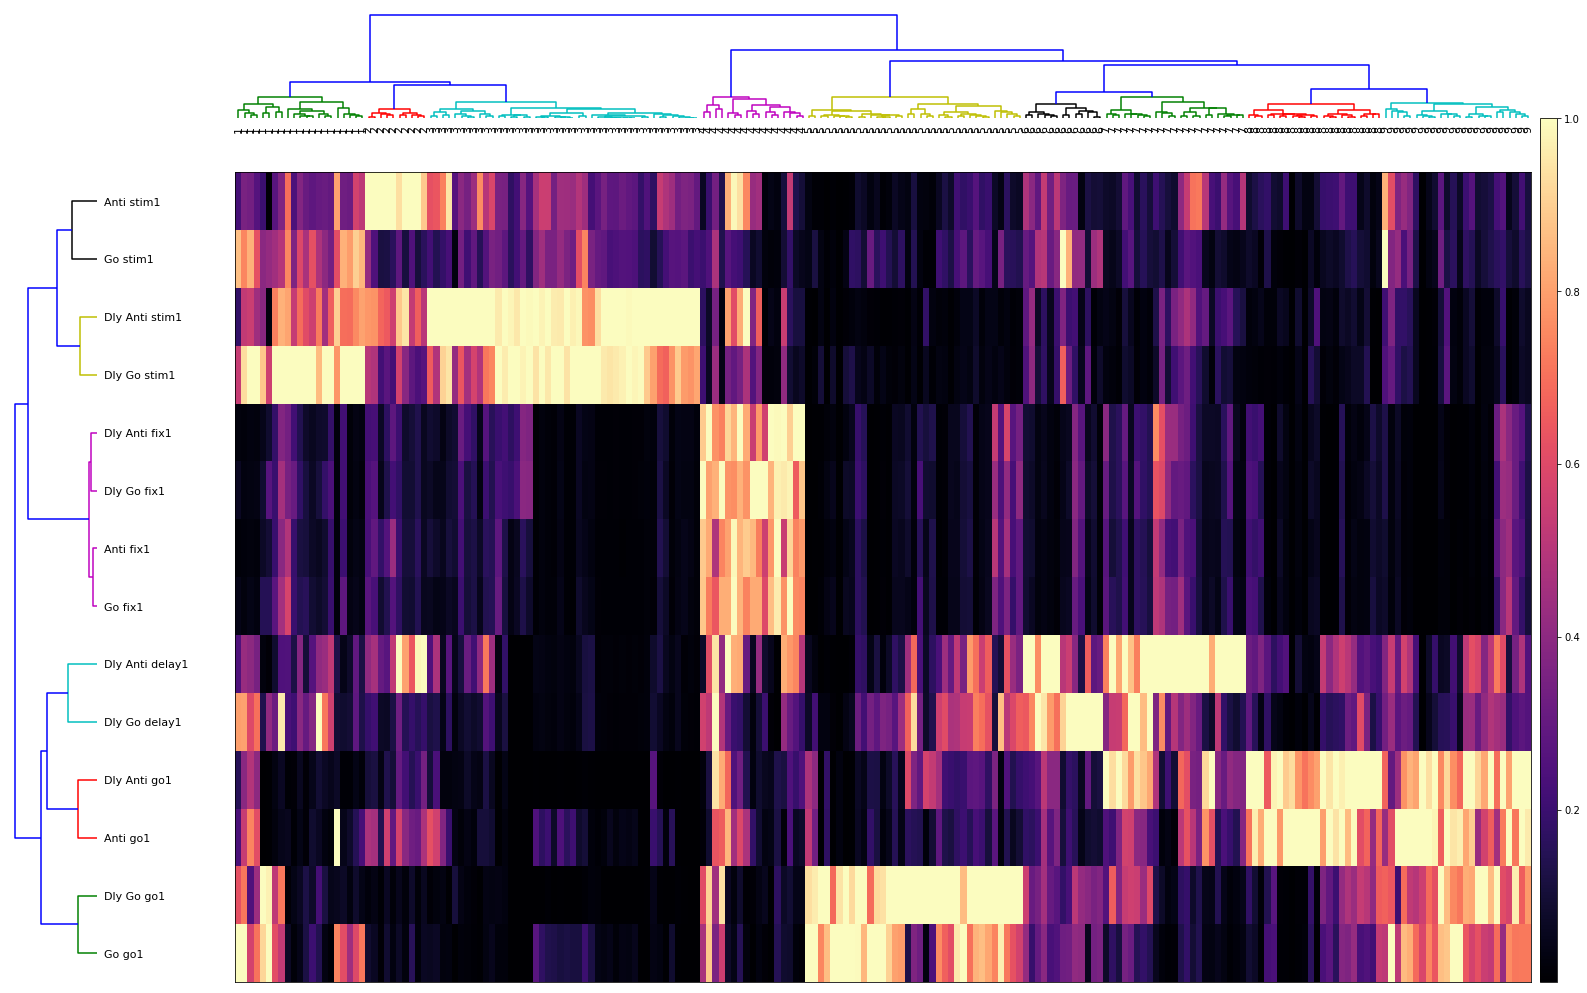

In [35]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/l2h000001_fdgo_fdanti_delaygo_delayanti/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/nonoise_fdgo_fdanti_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/nonoise_fdgo_fdanti_delaygo_delayanti/0/model.ckpt


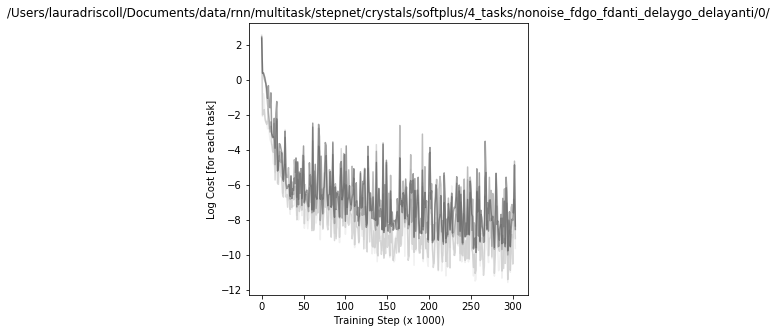

Choosing 24 clusters


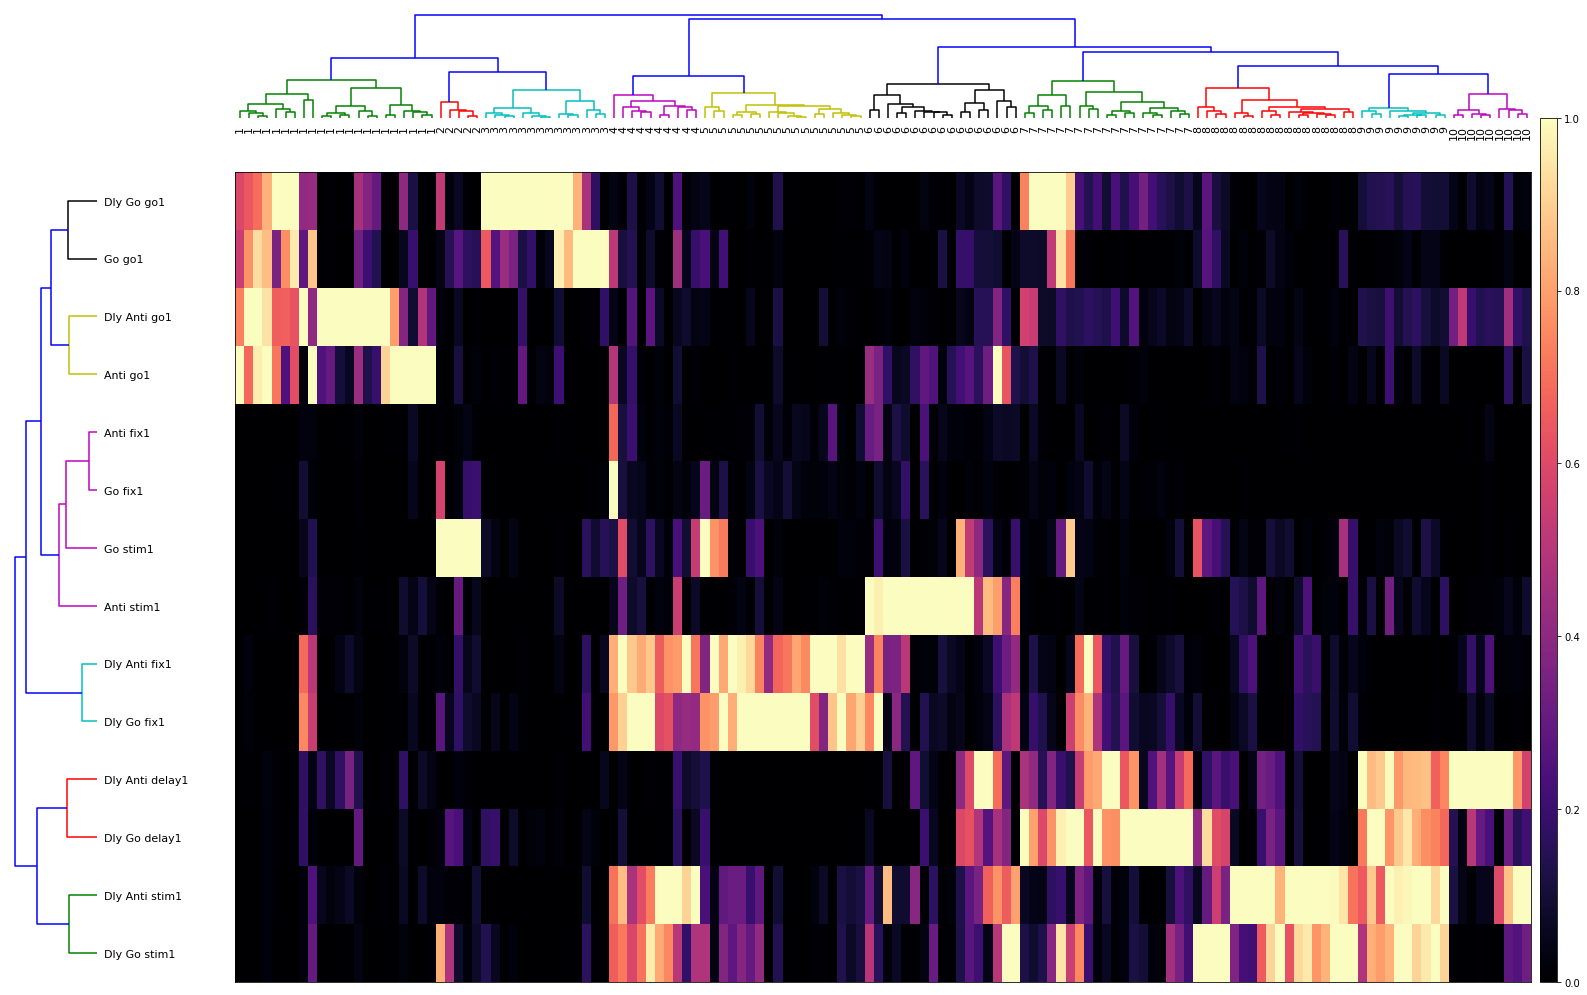

In [22]:
#NO NOISE
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/nonoise_fdgo_fdanti_delaygo_delayanti/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/no_noise/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/no_noise/0/model.ckpt


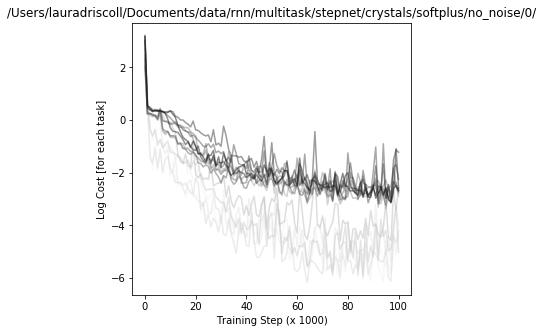

Choosing 22 clusters


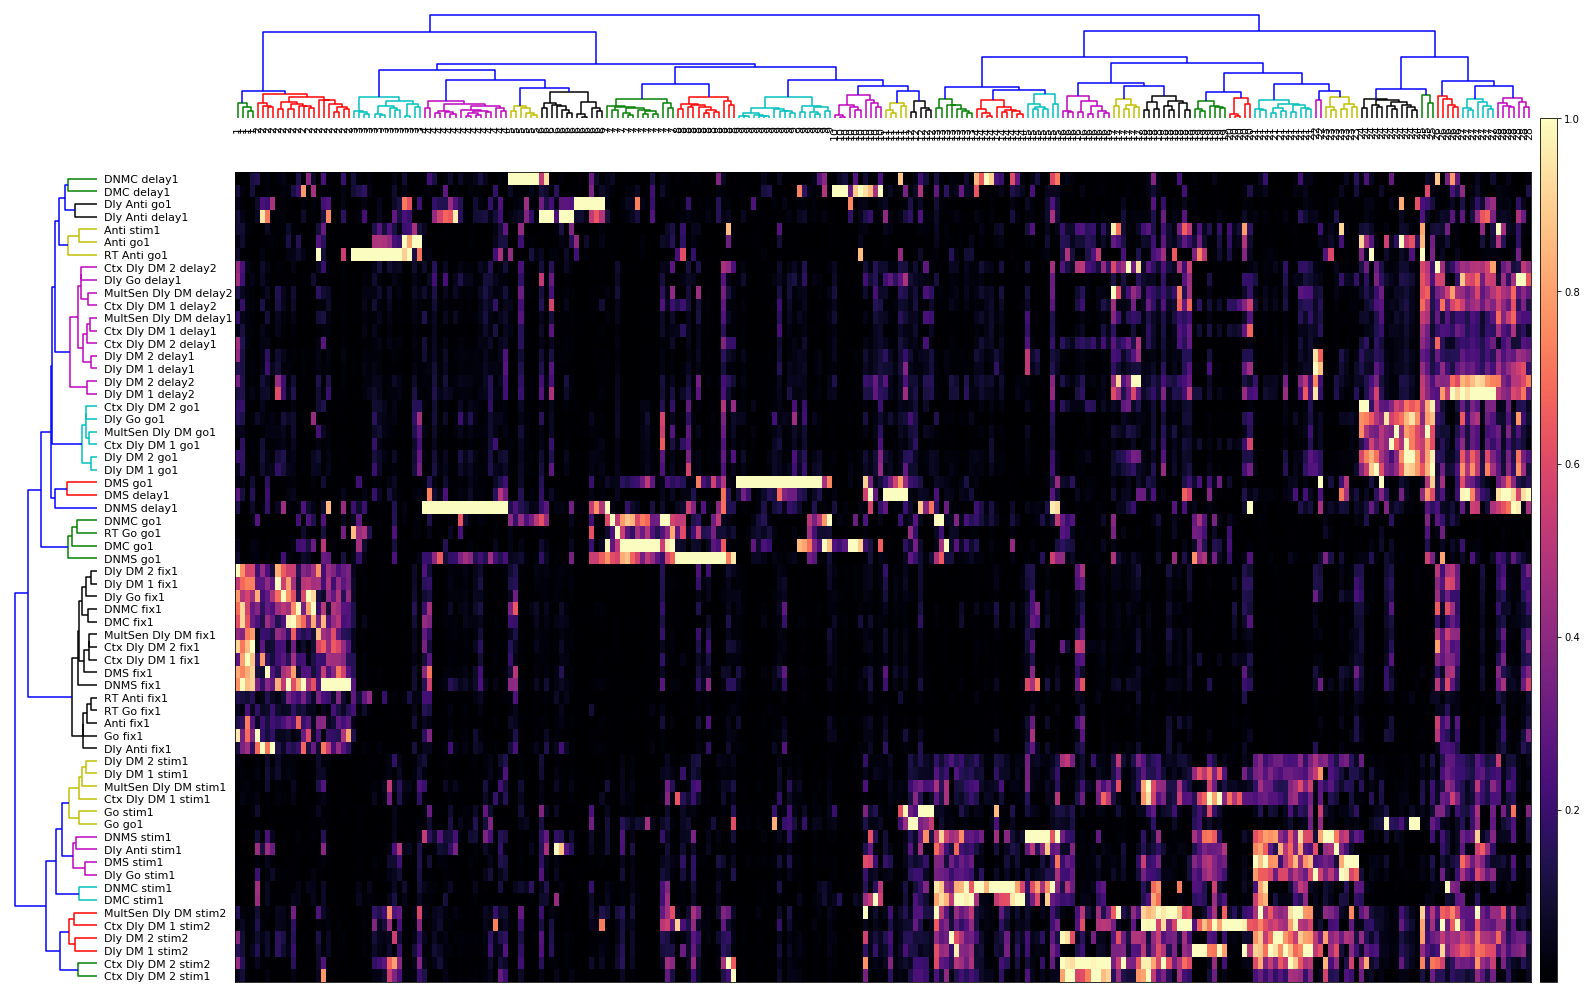

In [25]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'no_noise/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001/1/model.ckpt


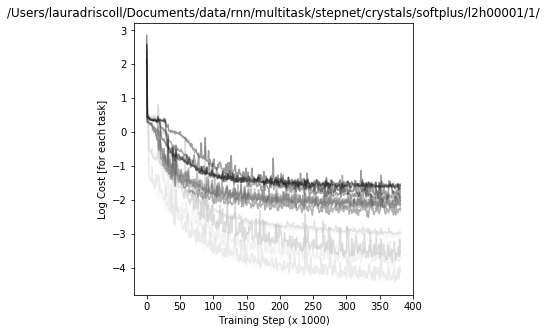

Choosing 17 clusters


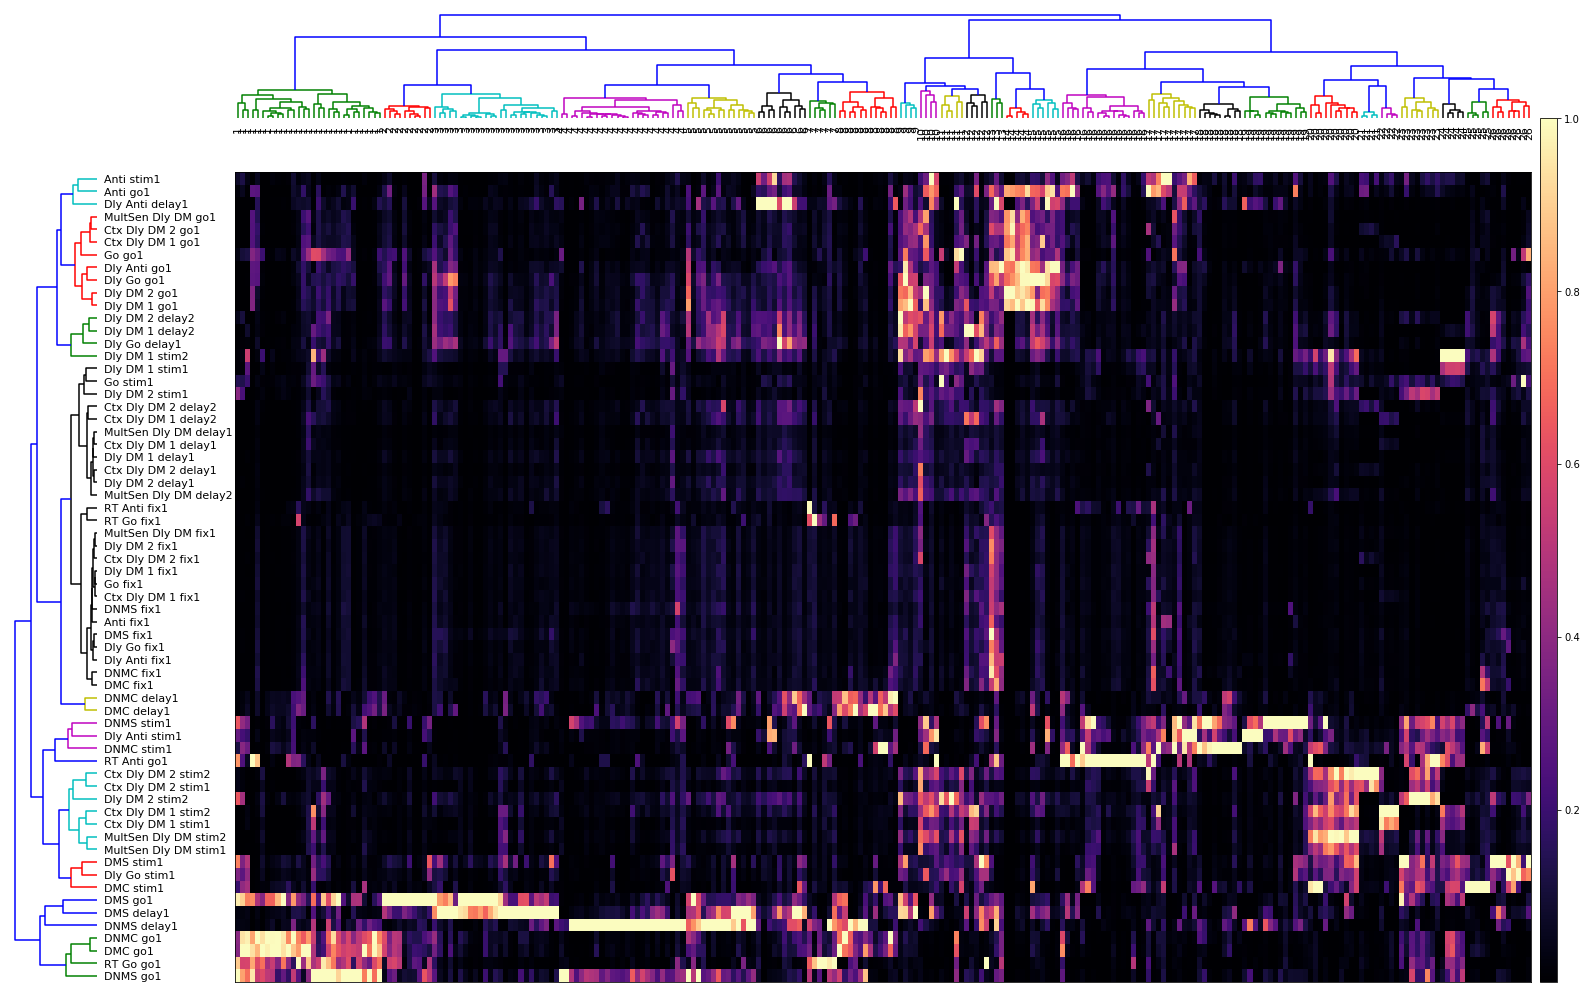

In [28]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'l2h00001/1/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2h00001_l2w0001/0/model.ckpt


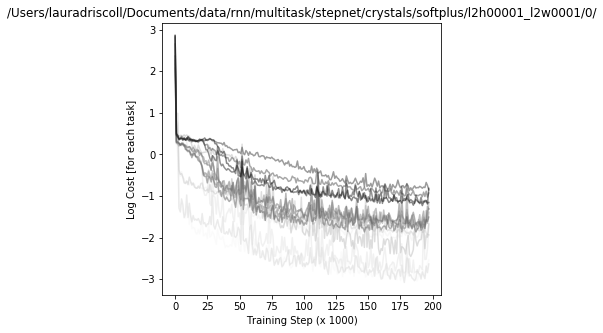

Choosing 18 clusters


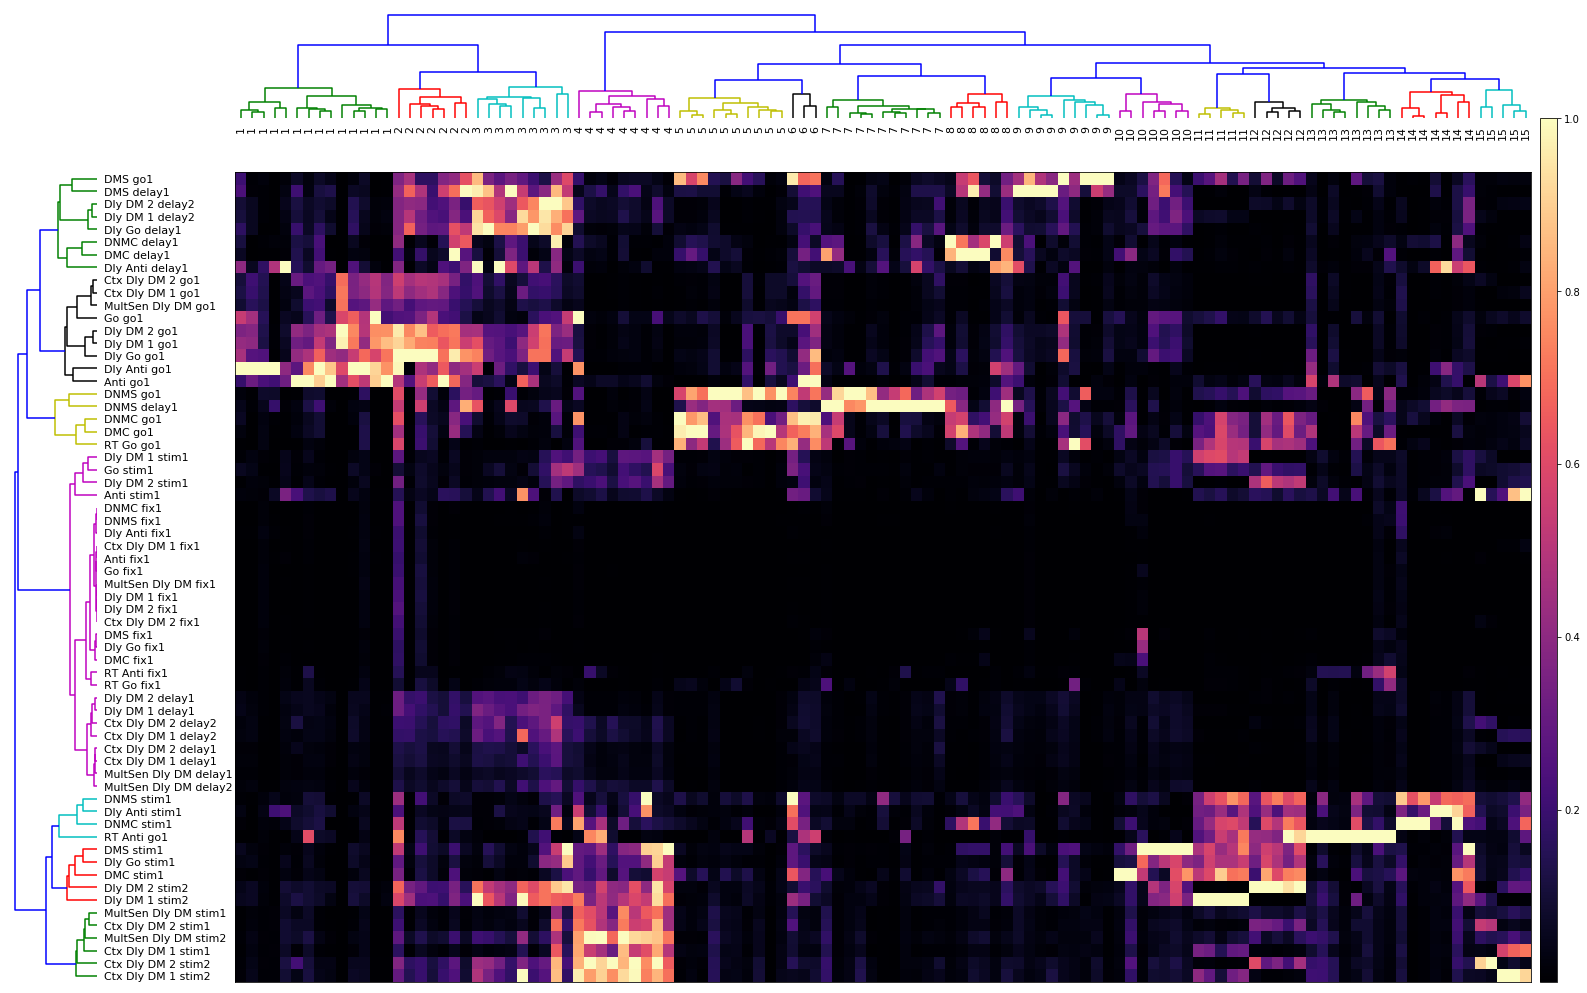

In [30]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'l2h00001_l2w0001/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


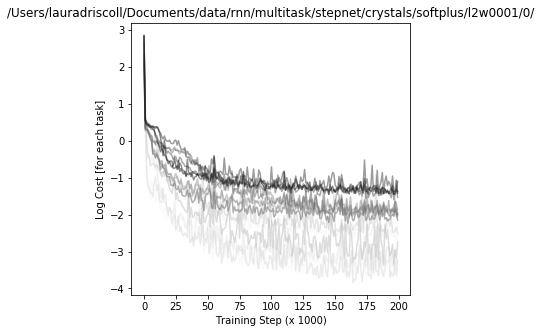

Choosing 18 clusters


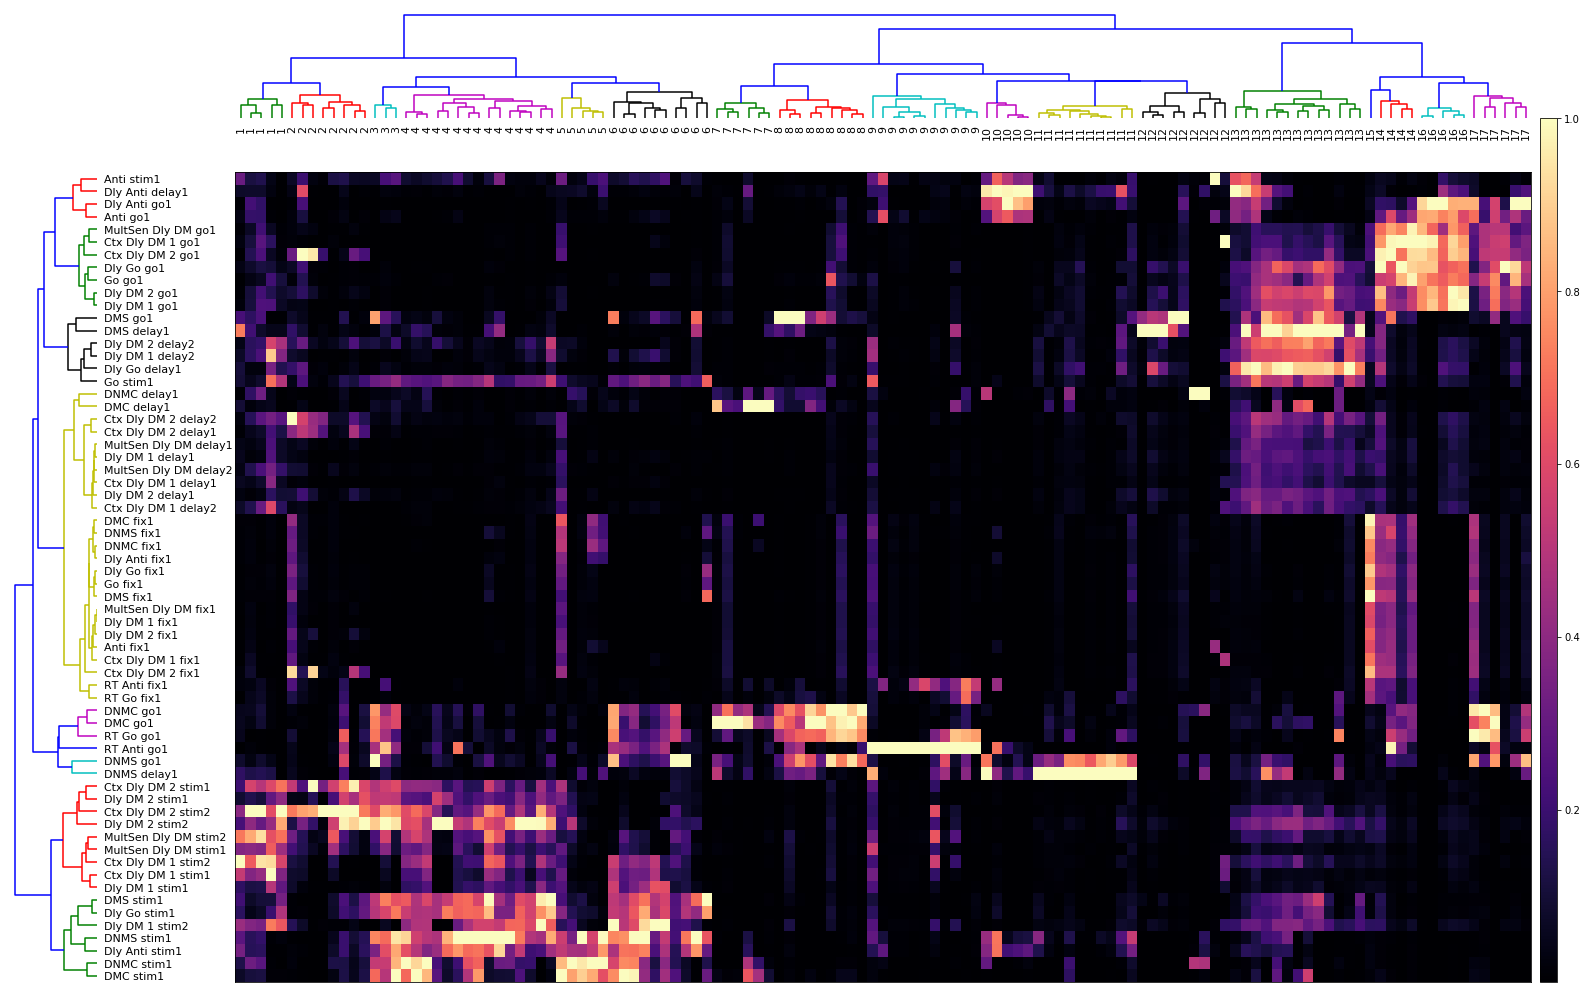

In [32]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = 'l2w0001/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/128_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/128_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


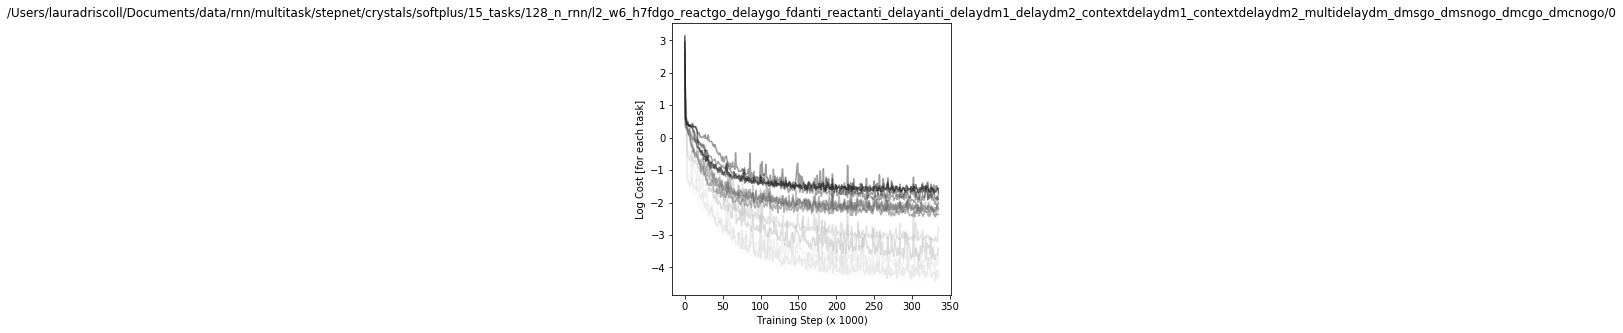

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(153, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/128_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/128_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
[u'fdgo', u'reactgo', u'delaygo', u'fdanti', u'reactanti', u'delayanti', u'delayd

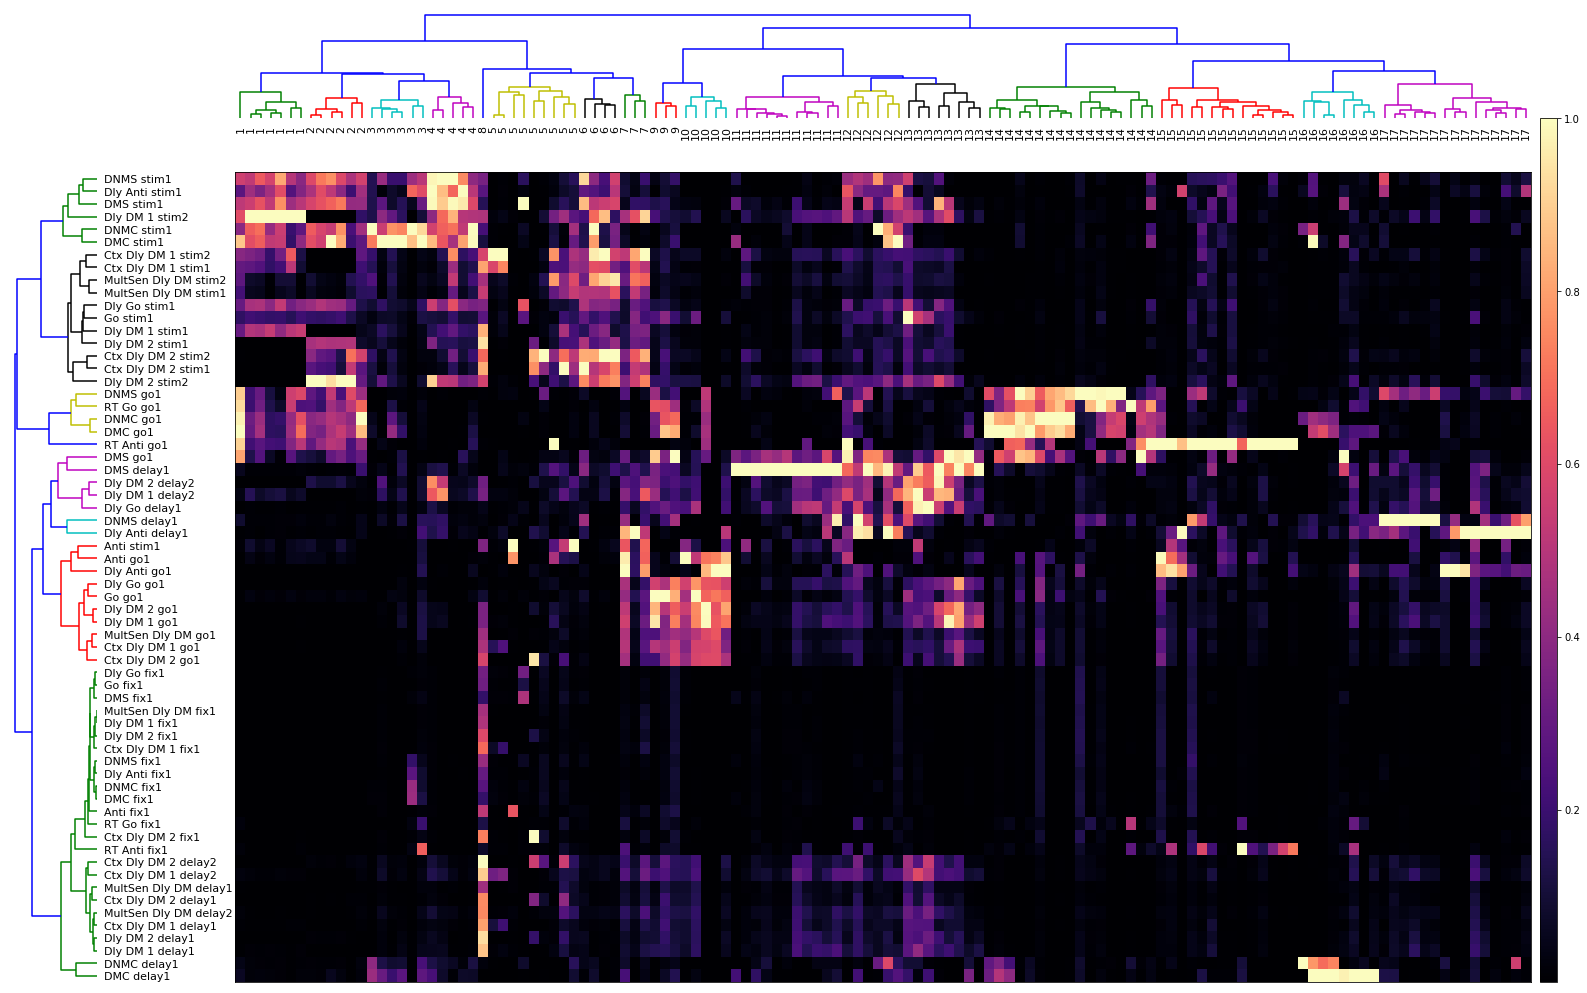

In [38]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
folder_spec = '15_tasks/128_n_rnn/'
file_spec = 'l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
model_n = 0
m = os.path.join(data_folder,folder_spec,file_spec,str(model_n))
plot_training(m)
variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/256_n_rnn/l2_w6_h7_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/256_n_rnn/l2_w6_h7_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


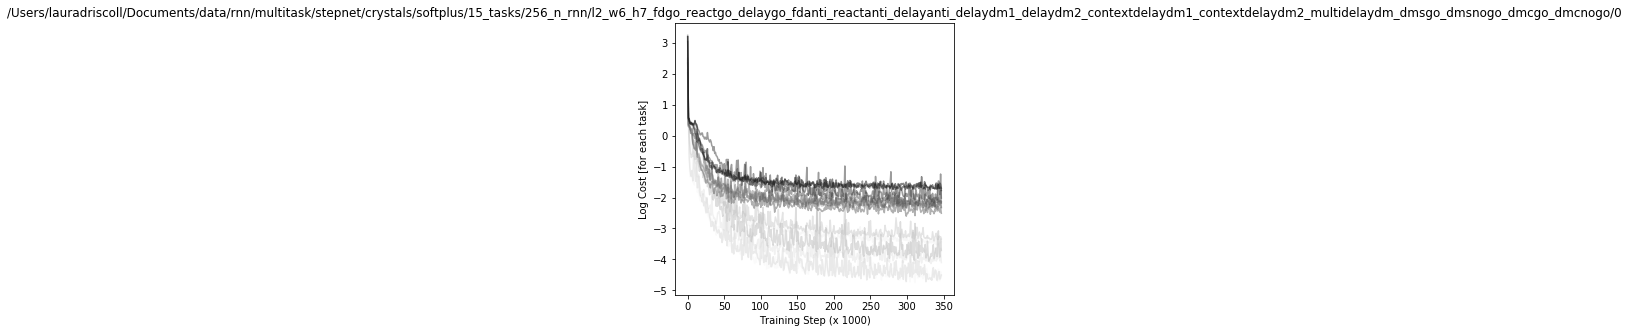

Choosing 31 clusters


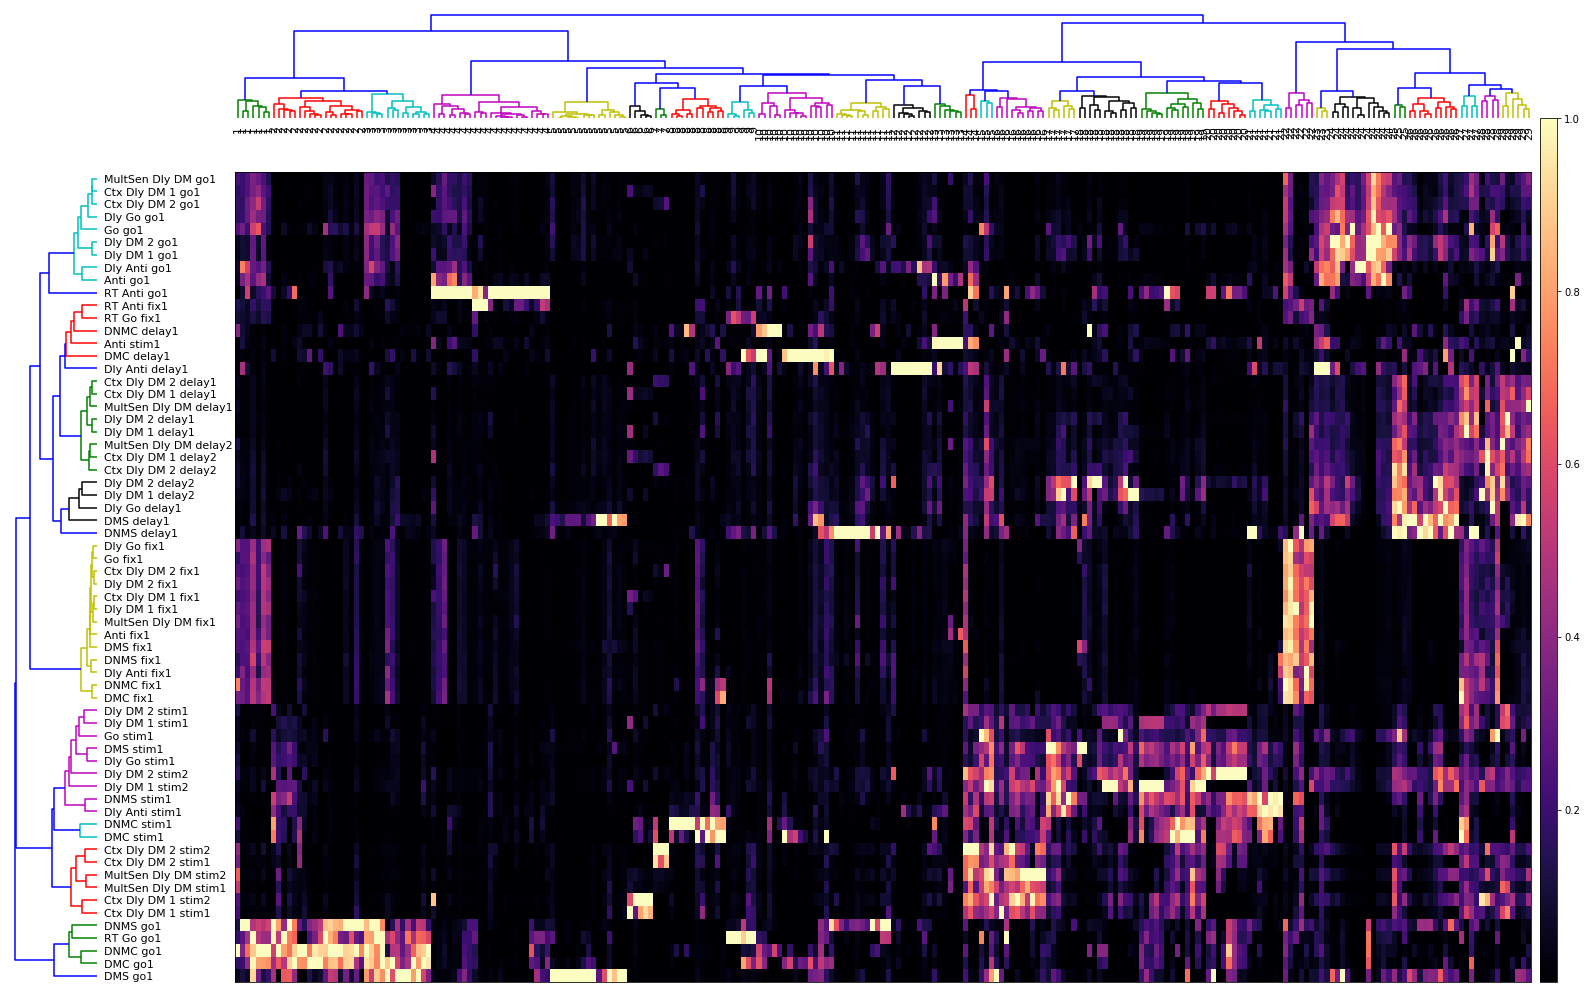

In [45]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
folder_spec = '15_tasks/256_n_rnn/'
file_spec = 'l2_w6_h7_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
model_n = 0
m = os.path.join(data_folder,folder_spec,file_spec,str(model_n))
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/512_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/512_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


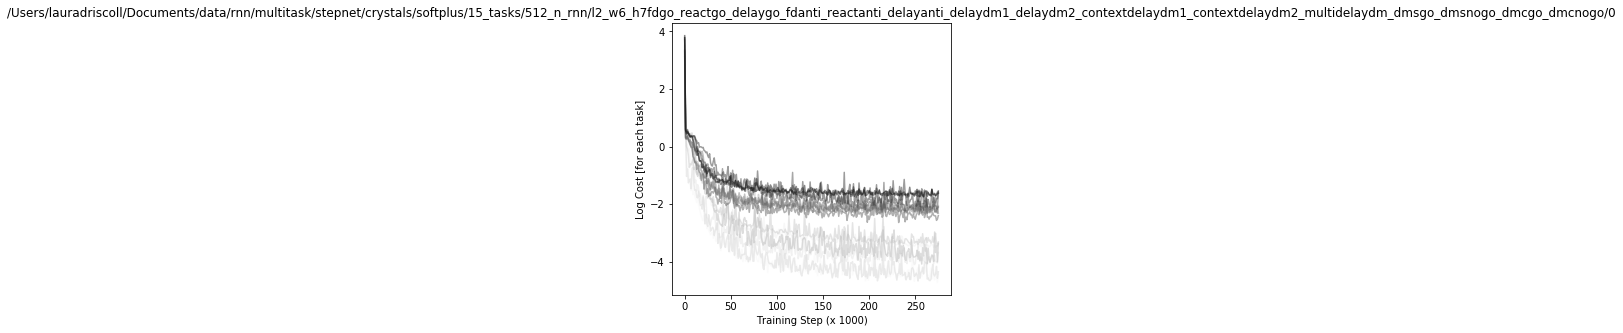

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(537, 512) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(512, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/512_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/512_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
[u'fdgo', u'reactgo', u'delaygo', u'fdanti', u'reactanti', u'delayanti', u'delayd

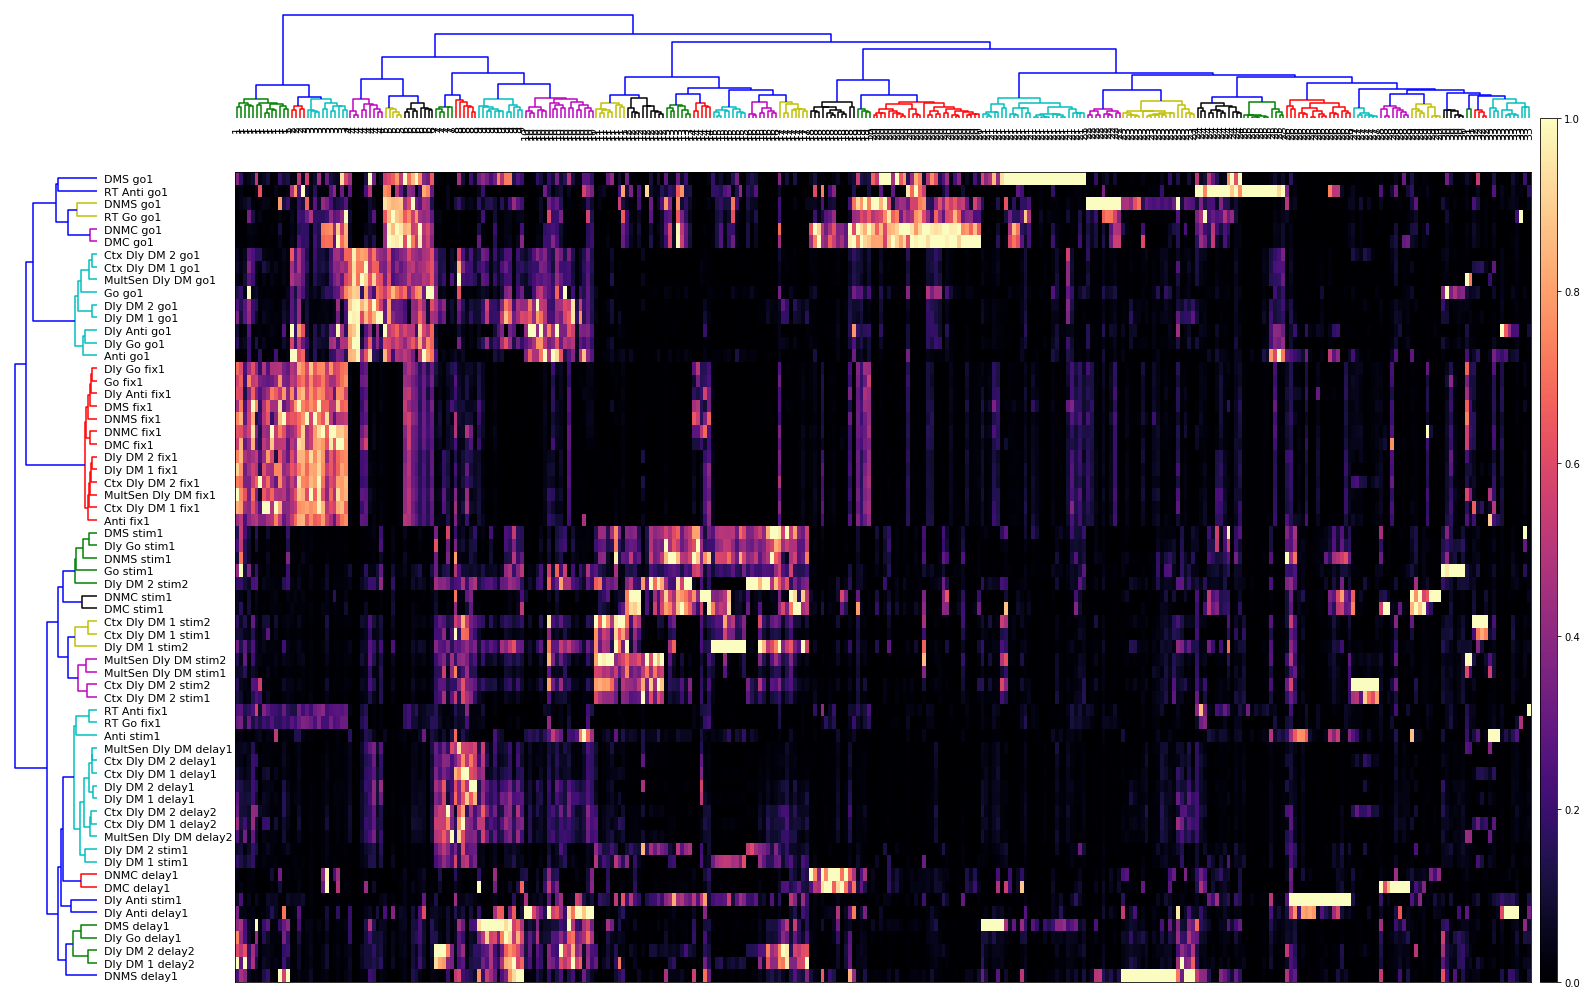

In [37]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
folder_spec = '15_tasks/512_n_rnn/'
file_spec = 'l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
model_n = 0
m = os.path.join(data_folder,folder_spec,file_spec,str(model_n))
plot_training(m)
variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/1024_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/1024_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


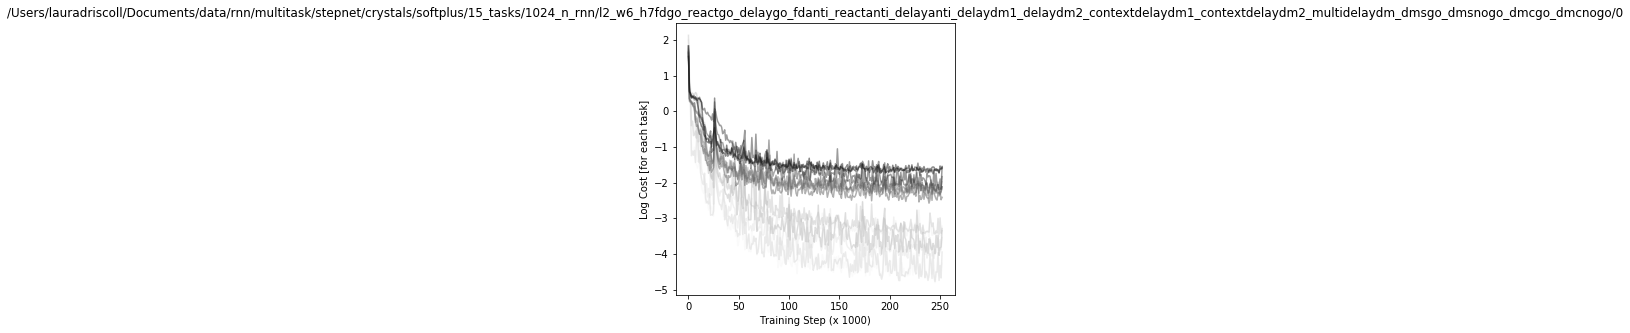

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1049, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/1024_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/1024_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
[u'fdgo', u'reactgo', u'delaygo', u'fdanti', u'reactanti', u'delayanti', u'

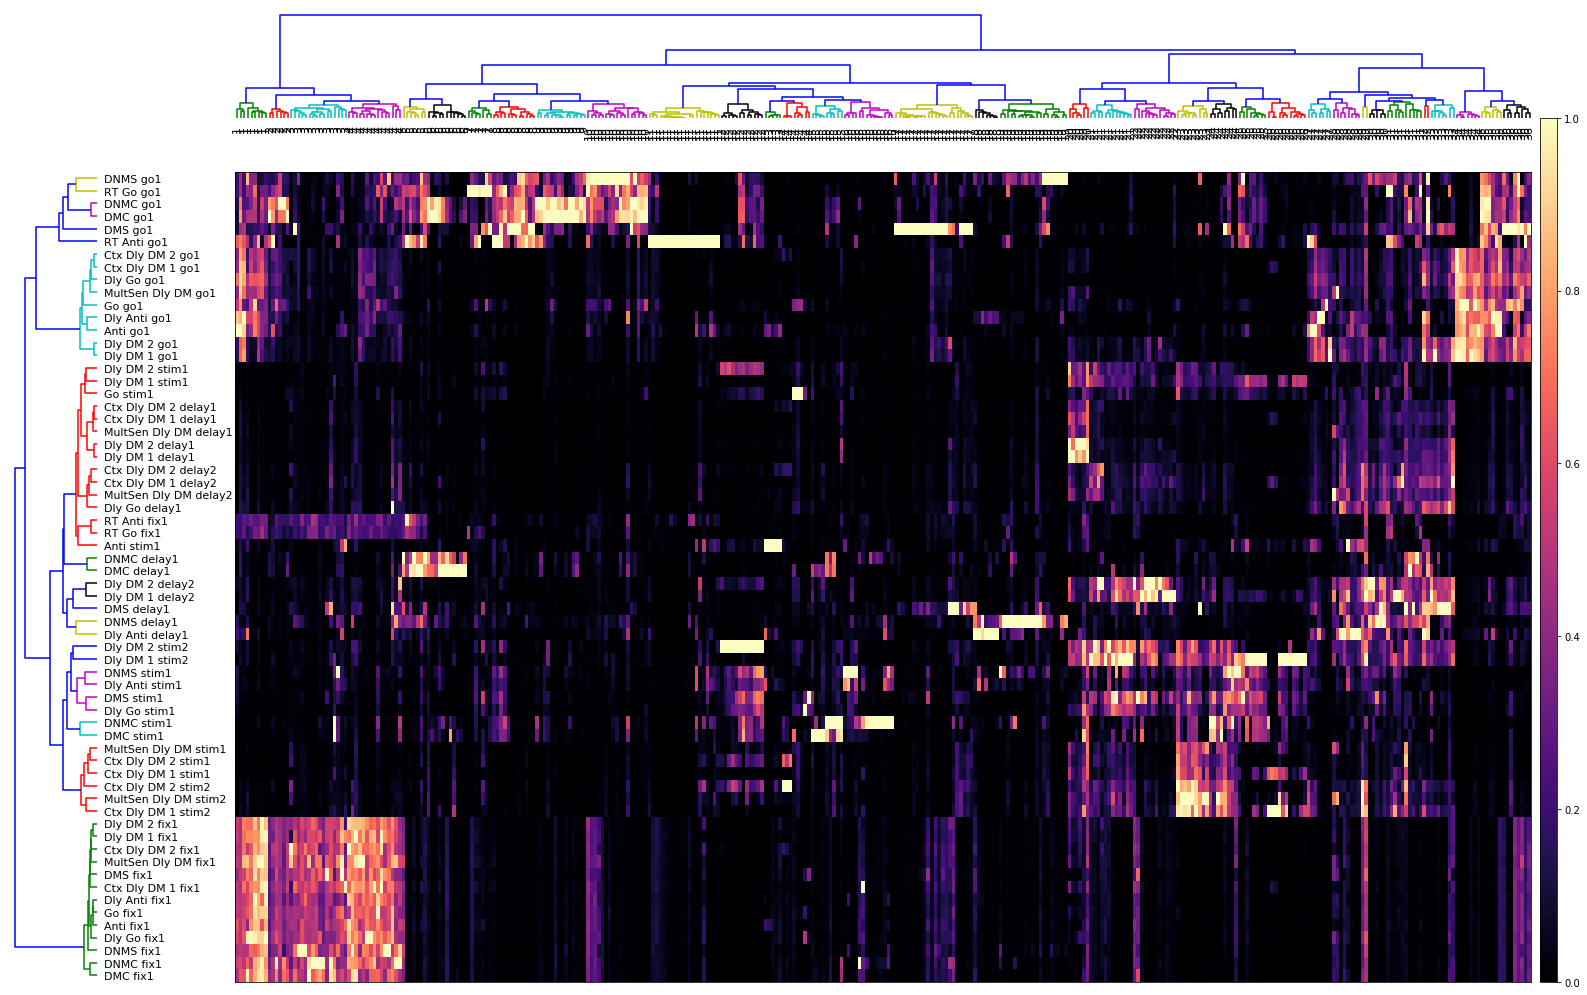

In [39]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
folder_spec = '15_tasks/1024_n_rnn/'
file_spec = 'l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
model_n = 0
m = os.path.join(data_folder,folder_spec,file_spec,str(model_n))
plot_training(m)
variance.compute_variance(m)
make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


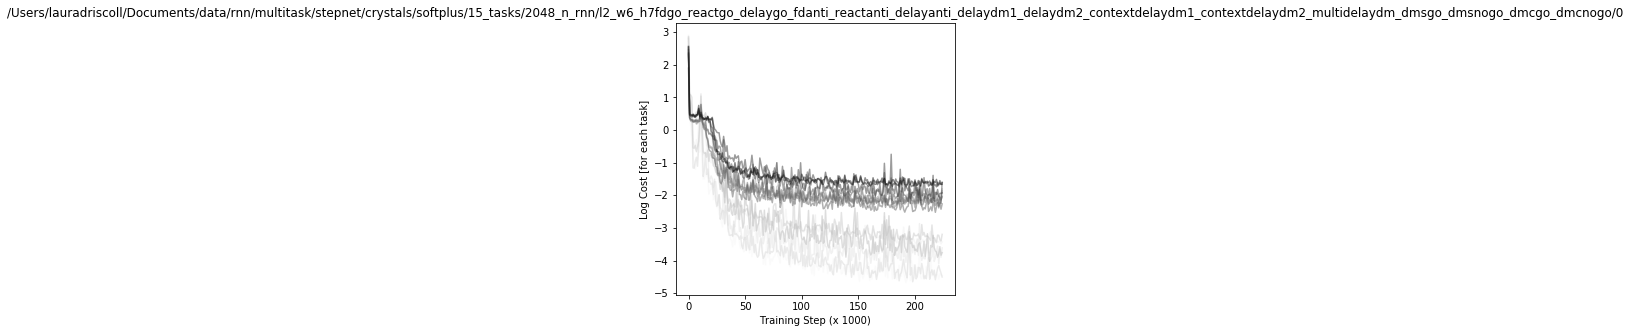

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(2073, 2048) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(2048,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(2048, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
[u'fdgo', u'reactgo', u'delaygo', u'fdanti', u'reactanti', u'delayanti', u'

/Users/lauradriscoll/Documents/code/multitask-nets/stepnet/task.py:147: RuntimeWarning: overflow encountered in multiply
  self.stim_strength = 100*np.empty((len(locs),4))


Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/variance_rule.pkl
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/15_tasks/2048_n_rnn/l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/variance_epoch.pkl
Choosing 2 clusters


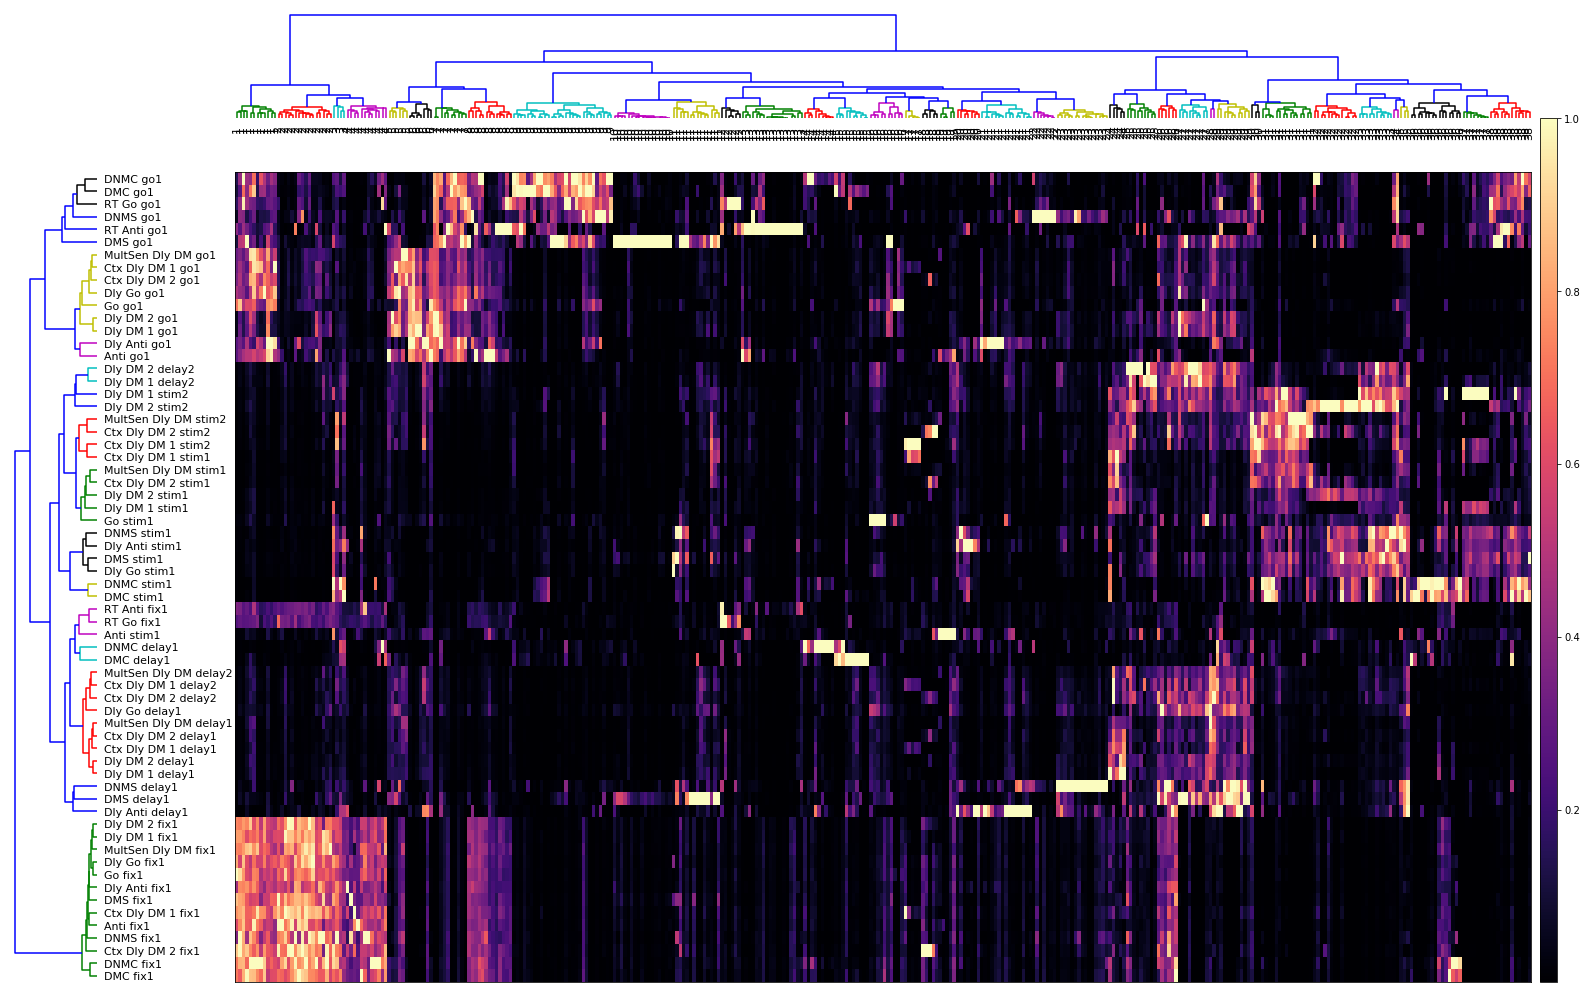

In [40]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
folder_spec = '15_tasks/2048_n_rnn/'
file_spec = 'l2_w6_h7fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
model_n = 0
m = os.path.join(data_folder,folder_spec,file_spec,str(model_n))
plot_training(m)
variance.compute_variance(m)
make_dendro(m)